# Uçuş Gecikmelerini Etkileyen Faktörler ve Gecikme Tahminleme Üzerine Bir Çalışma: 2015 Yılı Amerika Uçuşları Örneği 

### Name Surname

______________________________________________________________________________

## Özet

Bu çalışmanın amacı uçuş gecikmelerinin tahmin edilebilmesi için uçuş gecikmelerini etkileyen değişkenleri ve bunların etkilerini belirlemek, detaylı olarak incelemek ve elde edilen bulgulara uygun şekilde ders kapsamında işlenen makine öğrenmesi yaklaşımları ve uygulamalarda görülen diğer farklı modeller de kullanılarak gecikmeler üzerine tahmin modellemeleri yapmaktır.  Çalışmanın amacına ulaşılabilmesi için ABD Ulaştırma Bakanlığı'nın (DOT) Ulaştırma İstatistikleri Bürosu tarafından yayınlanan 2015 yılına ait uçuş veri seti kullanılmıştır. 

Çalışmada ilk olarak keşifçi veri analizi yöntemleriyle veri ön işleme aşamasında veri seti temizlenmiş, organize edilmiş ve temel istatistiksel değişkenler incelenerek temel çıkarımlar yapılmıştır.  Daha sonra temizlenen veri seti üzerinde seçilen yöntemlerle analizler yapılmıştır.  Yöntem bölümü 2 parçadan oluşmaktadır. 

İlk aşamada uçuşlarda yaşanan gecikmelerin hangi değişkenlere ve durumlara bağlı olarak gerçekleştiği incelenmiştir. Bulgular kalkış gecikmelerinin varış gecikmelerini tetiklediğini ve genel gecikmelerin de kalkılan ve varılan havaalanı ile havayolu şirketleri ile yakından ilişkili olduğunu göstermiştir. 

İlk aşamadaki bulgular ışığında taminleme için veri seti training ve test olarak ayrıldıktan ve  modelleme yapıldıktan sonra 'Lasso', 'Linear Regression', 'Ridge', 'Random forest Regressor', 'Decision Tree Regressor', ‘Boost regression', ve 'Bagged Regression’' yöntemleri ile tahminlemeler yapılmıştır. Modellerin sistematik olarak analiz edilebilmesi ve birbirleriyle karşılaştırmaların yapılabilmesi için Katardjiev, McKeever, ve Andreas Hamfelt’in (2019) model karşılaştırmalarını yapmak için önerdiği Box Whisker Plot yöntemi uygulanmıştır. 

__________________________________________________________

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
##gerekli kütüphanelerin import edilmesi
import pandas as pd #veri manipülasyonu için
import numpy as np #veri manipülasyonu için
import seaborn as sns #görselleştirme için
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from scipy.stats import skew

In [3]:
#veri setlerinin yüklenmesi
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv', low_memory=False) #veri seti çok büyük olduğu için Jupyter Notebook'un verdiği uyarı üzerine low_memory özelliği eklenmiştir. 

__________________________________________________________

## Havayolu Şirketlerinin İncelenmesi

In [4]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
airlines.info() #Verilerle ilgili detaylı bilgi almak için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [6]:
airlines.isnull().sum() #Boş olan verileri görmek için

IATA_CODE    0
AIRLINE      0
dtype: int64

## Havaalanı Bilgilerinin İncelenmesi

In [7]:
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [8]:
airports.info() #Verilerle ilgili detaylı bilgi almak için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [9]:
airports.isnull().sum() #Boş olan verileri görmek için

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [10]:
#airports.dropna(how='any',inplace=True)
#airports.isnull().sum()

## Veri Setlerinin Birleştirilmesi

In [11]:
# joining airlines
# flights = flights.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [12]:
# dropping old column and rename new one
# flights = flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
# flights = flights.rename(columns={"AIRLINE_y":"AIRLINE"})

## Uçuş Verilerinin İncelenmesi

In [13]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
flights.info() #Verilerle ilgili detaylı bilgi almak için

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [15]:
# Aslında kategorik veriler olan ama farklı tür işaretlenmiş 
# AIRLINE, DESTINATION_AIRPORT, ORIGIN_AIRPORT sütunlarının 
# veri türlerinin kategorik olarak düzeltilmesi 
cols = ["AIRLINE","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    flights[item] = flights[item].astype("category")

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype   
---  ------               -----   
 0   YEAR                 int64   
 1   MONTH                int64   
 2   DAY                  int64   
 3   DAY_OF_WEEK          int64   
 4   AIRLINE              category
 5   FLIGHT_NUMBER        int64   
 6   TAIL_NUMBER          object  
 7   ORIGIN_AIRPORT       category
 8   DESTINATION_AIRPORT  category
 9   SCHEDULED_DEPARTURE  int64   
 10  DEPARTURE_TIME       float64 
 11  DEPARTURE_DELAY      float64 
 12  TAXI_OUT             float64 
 13  WHEELS_OFF           float64 
 14  SCHEDULED_TIME       float64 
 15  ELAPSED_TIME         float64 
 16  AIR_TIME             float64 
 17  DISTANCE             int64   
 18  WHEELS_ON            float64 
 19  TAXI_IN              float64 
 20  SCHEDULED_ARRIVAL    int64   
 21  ARRIVAL_TIME         float64 
 22  ARRIVAL_DELAY        float64 
 23  DIVERTE

In [16]:
flights.isnull().sum() #Boş olan verileri görmek için

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [17]:
kaldırılacak_sutunlar = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                        'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
flights.drop(kaldırılacak_sutunlar, axis = 1, inplace = True)

In [18]:
# Değerlerinin % 25'inden fazlası eksik (NA, boş) sütunların kaldırılması
temizlenecek_sutunlar = flights.loc[:, flights.isna().mean() >= 0.25].columns
flights = flights.drop(temizlenecek_sutunlar, axis=1)

Uçuş gecikmesi, bir havayolu uçuşunun planlanan süresinden daha geç kalkması ve / veya inmesidir. 
Federal Havacılık İdaresi (FAA), bir uçuşun planlanan süresinden itibaren en az 15 dakika sapma olması durumunda uçuşun ertelenmiş yani gecikmiş sayılacağını kabul etmektedir. (https://en.wikipedia.org/wiki/Flight_cancellation_and_delay )

Bu uygulamaya göre 15 dakikanın altındaki sapmalar resmi olarak gecikme sayılmadığından bunları temzileyebiliriz.

In [19]:
gecikme_sayilmayan = (flights.DEPARTURE_DELAY < 15).sum()
gecikme_sayilmayan_ucus_yuzdesi = np.round(gecikme_sayilmayan * 100 / len(flights), 2)
print('Resmi olarak gecikme sayılmayan yani 15 dakikadan kısa gecikmeli {} uçuş kaydı var. Bu uçuşlar toplam uçuş kayıtlarının {}% ini oluşturmakta. ' 
      .format(gecikme_sayilmayan, gecikme_sayilmayan_ucus_yuzdesi))

Resmi olarak gecikme sayılmayan yani 15 dakikadan kısa gecikmeli 4675372 uçuş kaydı var. Bu uçuşlar toplam uçuş kayıtlarının 80.35% ini oluşturmakta. 


In [20]:
flights = flights[flights.DEPARTURE_DELAY >= 15] #gecikmesi 15 dk ve üzerinde olan gecikmeli uçuş kayıtlarının seçimi

In [21]:
gecikme_sayilmayan = (flights.DEPARTURE_DELAY < 15).sum()
gecikme_sayilmayan_ucus_yuzdesi = np.round(gecikme_sayilmayan * 100 / len(flights), 2)
print('Resmi olarak gecikme sayılmayan yani 15 dakikadan kısa gecikmeli {} uçuş kaydı var. Bu uçuşlar toplam uçuş kayıtlarının {}% ini oluşturmakta. ' 
      .format(gecikme_sayilmayan, gecikme_sayilmayan_ucus_yuzdesi))

Resmi olarak gecikme sayılmayan yani 15 dakikadan kısa gecikmeli 0 uçuş kaydı var. Bu uçuşlar toplam uçuş kayıtlarının 0.0% ini oluşturmakta. 


In [22]:
flights.isnull().sum()

MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
SCHEDULED_TIME            3
ELAPSED_TIME           7132
DISTANCE                  0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME           3441
ARRIVAL_DELAY          7132
dtype: int64

Veri setinde hala boş değere sahip sütunların olduğu görülmekte. Bu verilerin silinmesine karar vermeden önce veri setinin doluluğunun incelenmesi gerekiyor.

In [23]:
flight_kontrol = flights.isnull().sum(axis=0).reset_index()
flight_kontrol.columns = ['variable', 'missing values']
flight_kontrol['verilerin doluluk oranı (%)']=(flights.shape[0]-flight_kontrol['missing values'])/flights.shape[0]*100
flight_kontrol.sort_values('verilerin doluluk oranı (%)').reset_index(drop = True)

,variable,missing values,verilerin doluluk oranı (%)
0,ELAPSED_TIME,7132,99.325614
1,ARRIVAL_DELAY,7132,99.325614
2,ARRIVAL_TIME,3441,99.674627
3,SCHEDULED_TIME,3,99.999716
4,MONTH,0,100.000000
5,DAY,0,100.000000
6,DAY_OF_WEEK,0,100.000000
7,AIRLINE,0,100.000000
8,ORIGIN_AIRPORT,0,100.000000
9,DESTINATION_AIRPORT,0,100.000000


Değişken bazında verilerin doluluk oranlarının oldukça iyi (> %99) olduğunu görüyoruz. 
Bu çalışma kapsamında eksik verilerin doldurulma ihtimali olmadığından, %99 doluluk oranı yeterli kabul edilecek ve eksik değerleri içeren kayıtlar silinecektir. 

In [24]:
flights.dropna(inplace = True)

In [25]:
flights.describe().round() #Temel İstatistik Bilgilerin İncelenmesi

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
count,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0,1050422.0
mean,6.0,16.0,4.0,1499.0,1563.0,60.0,146.0,141.0,851.0,1644.0,1596.0,55.0
std,3.0,9.0,2.0,444.0,475.0,65.0,76.0,74.0,607.0,508.0,613.0,67.0
min,1.0,1.0,1.0,1.0,1.0,15.0,18.0,16.0,31.0,1.0,1.0,-60.0
25%,3.0,8.0,2.0,1150.0,1231.0,23.0,89.0,85.0,399.0,1330.0,1308.0,17.0
50%,6.0,16.0,4.0,1540.0,1626.0,38.0,128.0,124.0,692.0,1733.0,1735.0,35.0
75%,9.0,23.0,5.0,1845.0,1936.0,71.0,178.0,174.0,1089.0,2039.0,2052.0,70.0
max,12.0,31.0,7.0,2359.0,2400.0,1988.0,718.0,731.0,4983.0,2400.0,2400.0,1971.0


MONTH
Skewness: 0.12697098219011305


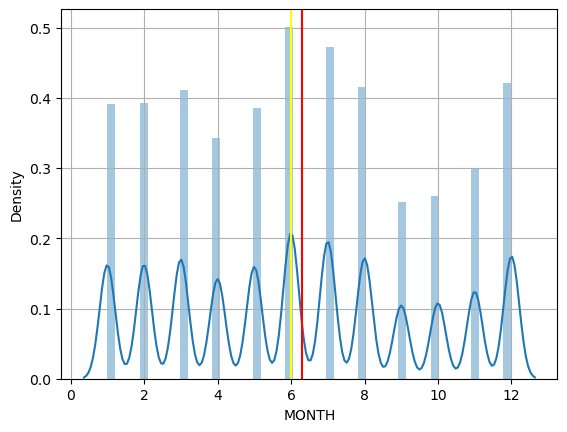

DAY
Skewness: 0.004944348783070077


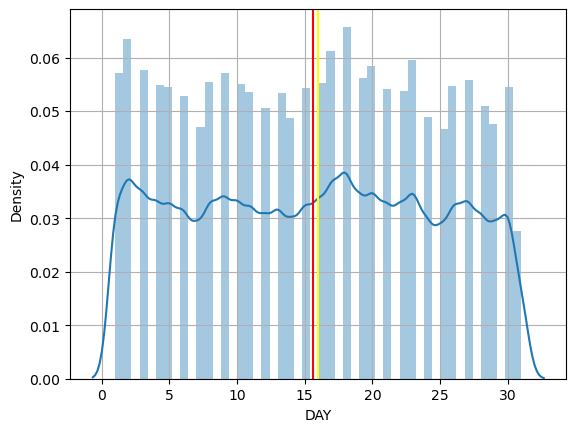

DAY_OF_WEEK
Skewness: 0.07206810723091


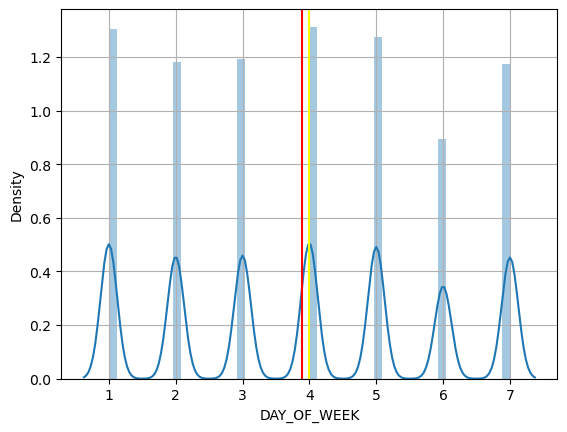

SCHEDULED_DEPARTURE
Skewness: -0.3537624047937688


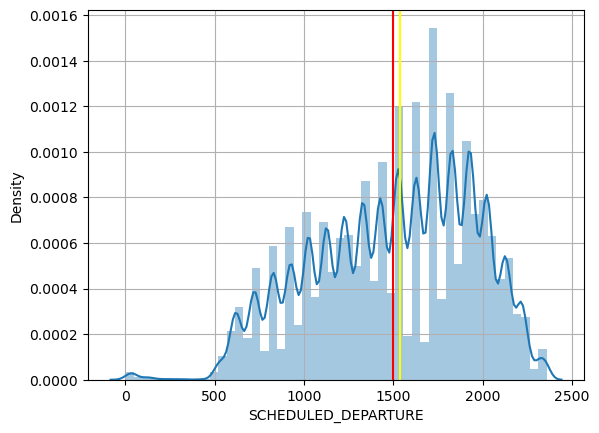

DEPARTURE_TIME
Skewness: -0.6260863420875075


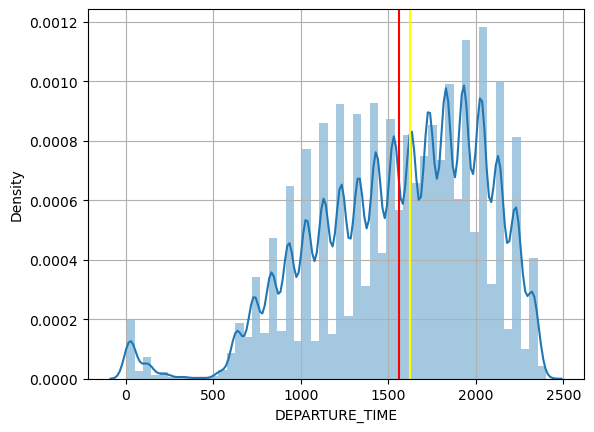

DEPARTURE_DELAY
Skewness: 4.925760721738313


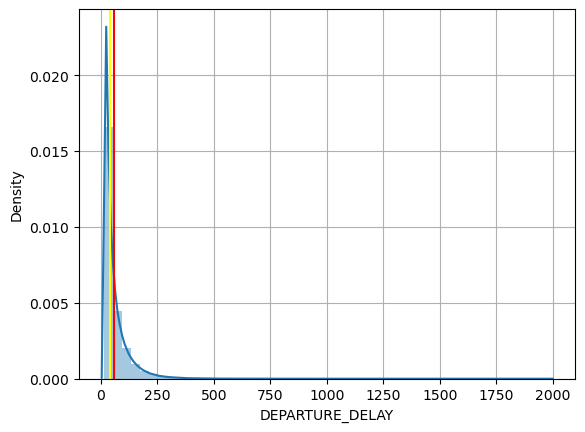

SCHEDULED_TIME
Skewness: 1.3117252891189137


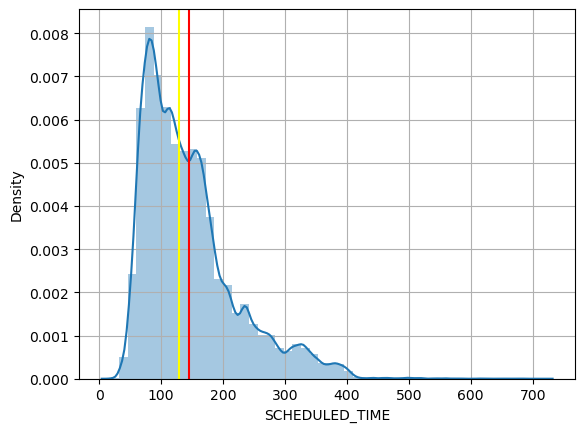

ELAPSED_TIME
Skewness: 1.3127907742122797


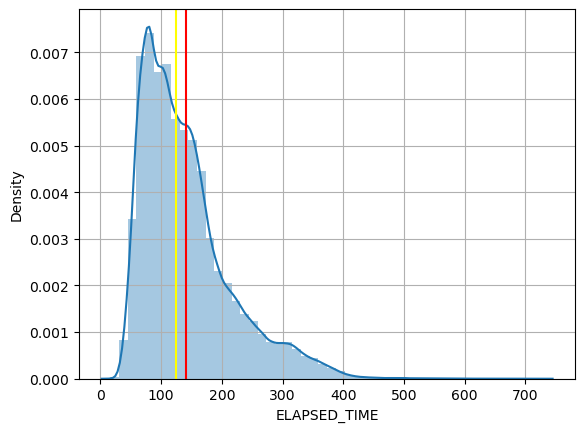

DISTANCE
Skewness: 1.371875235141663


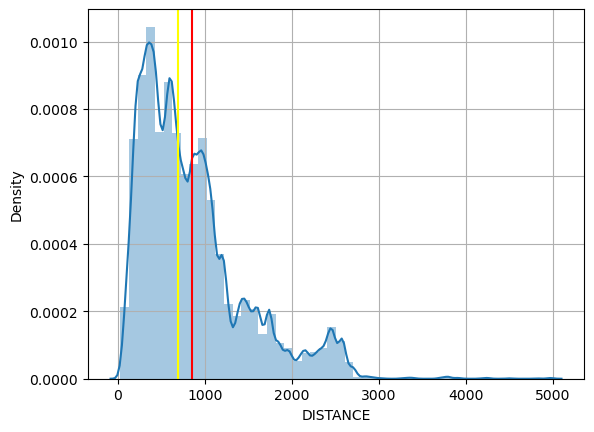

SCHEDULED_ARRIVAL
Skewness: -0.9180850076372713


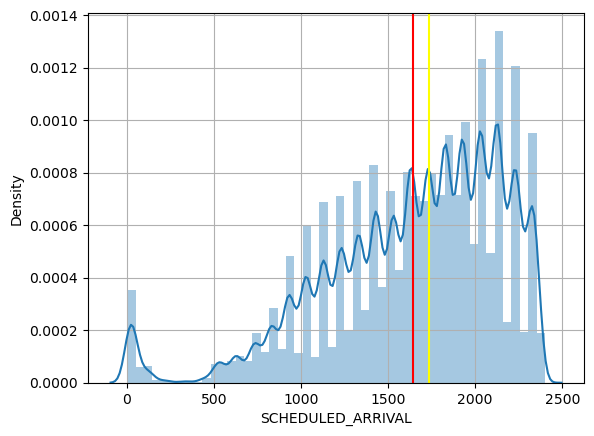

ARRIVAL_TIME
Skewness: -1.0987600952765342


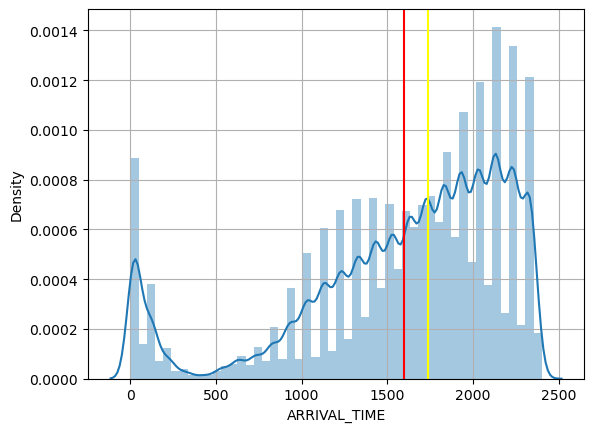

ARRIVAL_DELAY
Skewness: 4.506080150223321


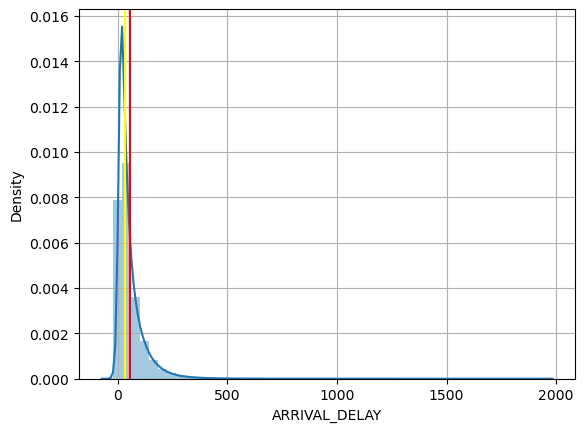

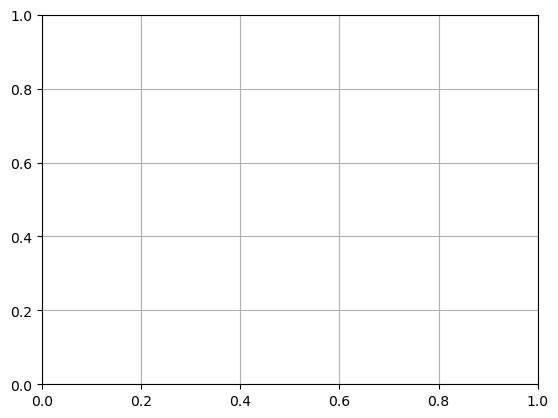

In [26]:
df_num=flights.select_dtypes(["float64","int64"])
for col in df_num:
    print(col)
    print(f"Skewness: {skew(df_num[col])}")
    mwidth=df_num[col].mean()
    dwidth=df_num[col].median()
    plt.figure()
    sns.distplot(df_num[col])
    plt.axvline(mwidth,color="red")
    plt.axvline(dwidth,color="yellow")
    plt.grid(True)
    plt.show()
    
plt.grid(True)

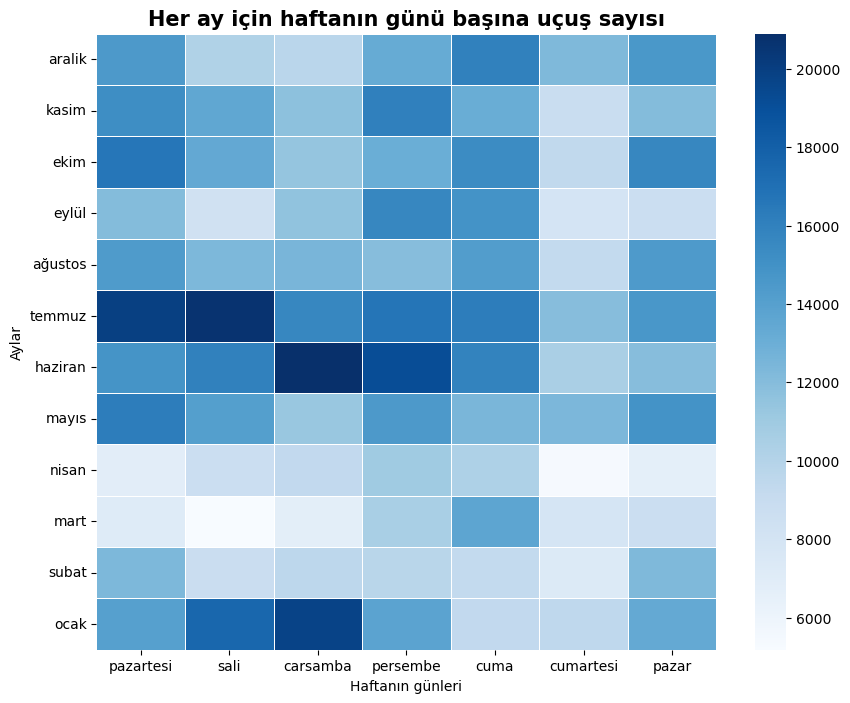

In [27]:
gunler =['pazartesi','sali','carsamba','persembe','cuma','cumartesi','pazar']
aylar = ['ocak', 'subat', 'mart', 'nisan', 'mayıs', 'haziran', 'temmuz', 'ağustos', 'eylül', 'ekim', 'kasim', 'aralik']

pddf=pd.DataFrame({'count' : flights.groupby( ['MONTH', 'DAY_OF_WEEK'] ).size()}).reset_index()
pddf = pddf.pivot("MONTH", "DAY_OF_WEEK", "count")
fig, ax=plt.subplots(figsize=(10,8))
ax = sns.heatmap(pddf, ax=ax,  
                  linewidths=.5,
                  fmt='d',
                  cmap='Blues',)
ax.set_xticklabels(gunler)
ax.set_yticklabels(list(reversed(aylar)), rotation=0)
ax.set(xlabel='Haftanın günleri', ylabel='Aylar')
ax.set_title("Her ay için haftanın günü başına uçuş sayısı", fontweight="bold", size=15)

plt.show()

Bu grafik, yıl boyunca hafta içi uçuş sayısının genel olarak sabit olduğunu, Cumartesi ve Pazar günleri ise azaldığını göstermektedir. Her ayın kendi yopun dönemleri olduğu fark edilebilir, örneğin, Ocak ayında Cuma günleri ve hafta sonları daha fazla uçuş varken, Mart ayında Pazartesi günleridir. Ayrıca ısı haritası, verilerden gelen ilgili bilgileri aramak için daha iyi bir veri görselleştirmesi sunabilir. Harita, hafta içi günler ve hafta sonları arasındaki farkı daha iyi gösterir, Noel, Yaz veya bahar tatili gibi tatillerin olduğu aylarda bazı hafta sonları artan değerler gösterse bile, en yüksek uçuş sayısı her zaman hafta içinde, minimum uçuşlar ise hafta sonlarındadır. 

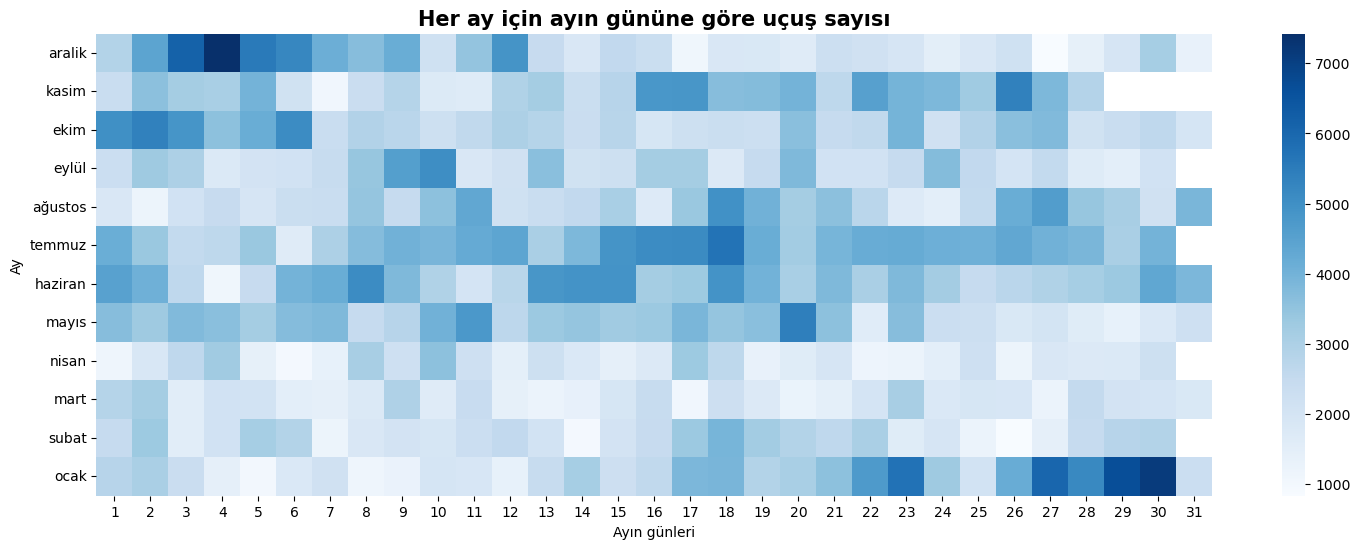

In [28]:
pddf=pd.DataFrame({'count' : flights.groupby(['MONTH','DAY']).size()}).reset_index()

# use a heatmap to better visualize the data
pddf = pddf.pivot("MONTH", "DAY", "count")
f, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pddf,
            cmap='Blues')

# set plot's labels
ax.set_yticklabels(list(reversed(aylar)), rotation=0)
ax.set(xlabel='Ayın günleri', ylabel='Ay')
ax.set_title("Her ay için ayın gününe göre uçuş sayısı", fontweight="bold", size=15)

plt.show()

Ayların son günlerinde uçuş sayısı azalmaktadır, bunun nedeni tüm ayların aynı gün sayısına sahip olmamasıdır (bir sonraki grafikte beyaz kutulardan da anlaşılacağı gibi). Benzer şekilde Şubat ayının diğer aylara göre daha az uçuş sayısına sahip olduğunu da görebiliriz.

Genel olarak dönemsel farklılıklar çok fazla olmadığından herhangi bir ek işleme gerek duyulmamaktadır.


### Uçuş Verileri Arasındaki Korelasyonun İncelenmesi

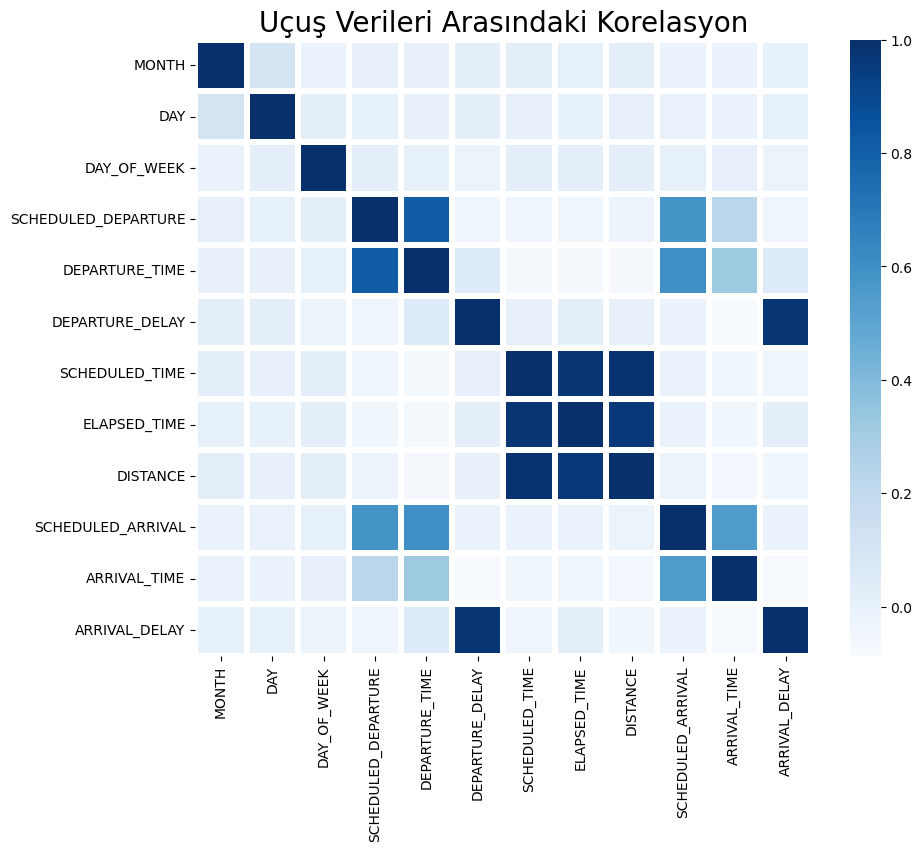

In [29]:
plt.figure(figsize=(10,8))
plt.title('Uçuş Verileri Arasındaki Korelasyon', fontsize=20)
sns.heatmap(flights.corr(), cbar=True, annot =False, square=True, fmt='.2f',annot_kws={'size':15}, linewidth=3, cmap='Blues')
plt.show()

______________________________________________________________________________

## Uçuşların Genel Gecikme Durumu

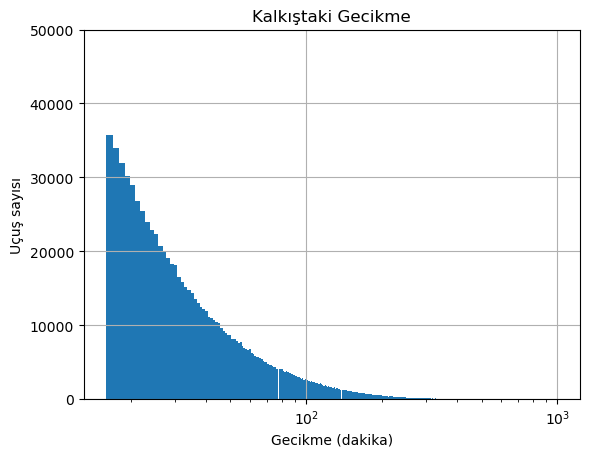

In [30]:
fig, ax = plt.subplots()
flights.DEPARTURE_DELAY.hist(ax=ax, bins=1000, range=(16, 1000))
ax.set_xscale('log')
plt.ylim(0, 50000)
plt.title('Kalkıştaki Gecikme')
plt.xlabel('Gecikme (dakika)')
plt.ylabel('Uçuş sayısı')
plt.show()

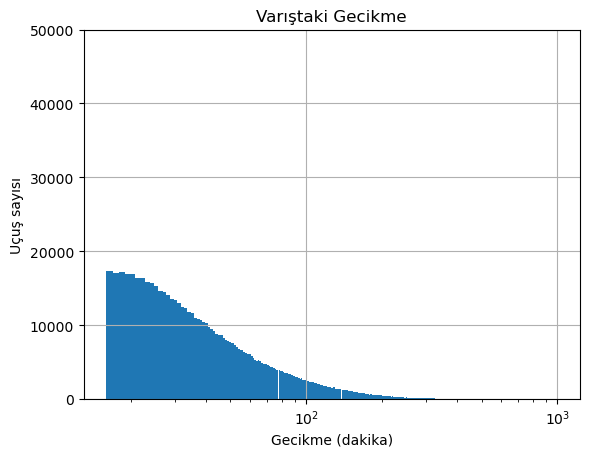

In [31]:
fig, ax = plt.subplots()
flights.ARRIVAL_DELAY.hist(ax=ax, bins=1000, range=(16, 1000))
ax.set_xscale('log')
plt.ylim(0, 50000)
plt.title('Varıştaki Gecikme')
plt.xlabel('Gecikme (dakika)')
plt.ylabel('Uçuş sayısı')
plt.show()

In [32]:
delay_type = lambda x:((0,1)[x >= 30],2)[x >= 60]
flights['DELAY_TYPE'] = flights['DEPARTURE_DELAY'].apply(delay_type)
# 1 = 15 dakikadan fazla ve 30 dakikadan az gecikme
# 2 = 30 dakikadan fazla ve 1 saatten az gecikme
# 3 = 1 saatten fazla gecikme   
flights.head(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DELAY_TYPE
20,1,1,4,NK,LAS,MCI,55,120.0,25.0,162.0,143.0,1139,537,543.0,6.0,0
29,1,1,4,AA,DEN,MIA,120,141.0,21.0,227.0,208.0,1709,707,709.0,2.0,0
30,1,1,4,NK,PHX,ORD,125,237.0,72.0,204.0,175.0,1440,549,632.0,43.0,2
52,1,1,4,B6,SJU,MCO,400,535.0,95.0,185.0,175.0,1189,605,730.0,85.0,2
55,1,1,4,B6,SJU,BDL,438,550.0,72.0,241.0,258.0,1666,739,908.0,89.0,2


### Gecikmeler kalkışta mı varışta mı gerçekleşiyor? 

In [33]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

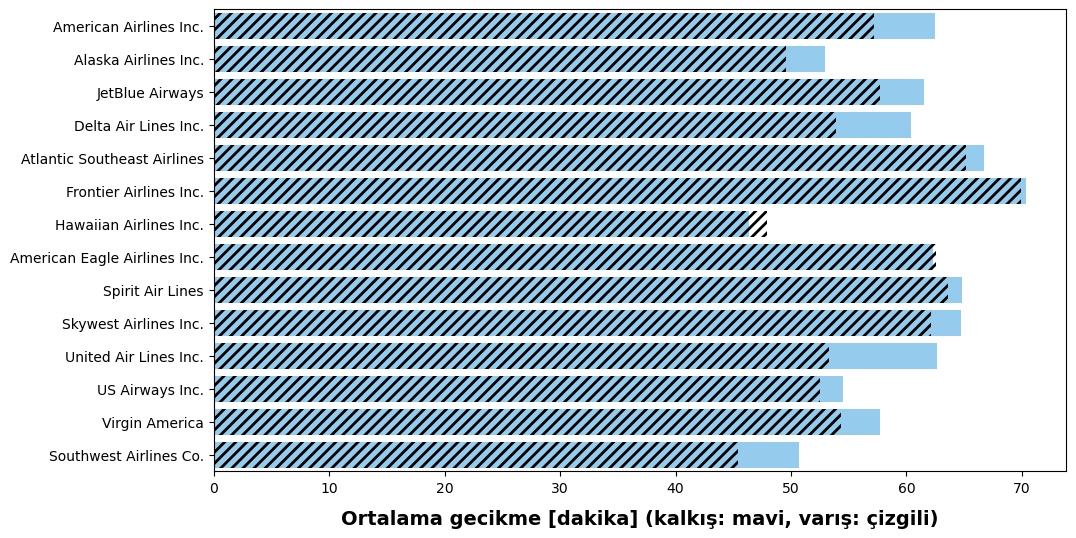

In [34]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=flights, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=flights, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Ortalama gecikme [dakika] (kalkış: mavi, varış: çizgili)',
           fontsize=14, weight = 'bold', labelpad=10);
plt.show()

Bu grafikte varıştaki gecikmelerin kalkıştaki gecikmeden genellikle daha kısa olduğu görülmektedir. Bunun sebebi havayolu şirketlerinin gecikmeyi azaltmak için uçuş hızını artırmak gibi düzenlemeler yapmasından kaynaklı olabilir. 
Alınabilecek aksiyonlar havayolu şirketinin büyüklüğüne ve duruma göre değişebileceğinden gecikme tahminlemeleri sadece kalkıştaki gecikme üzerinden yapılacaktır.

Keşifçi veri analizlerinde ise veri setinin ve durumun tam olarak anlaşılabilmesi için hem kalkış hem de varış gecikmeleri incelenecektir.

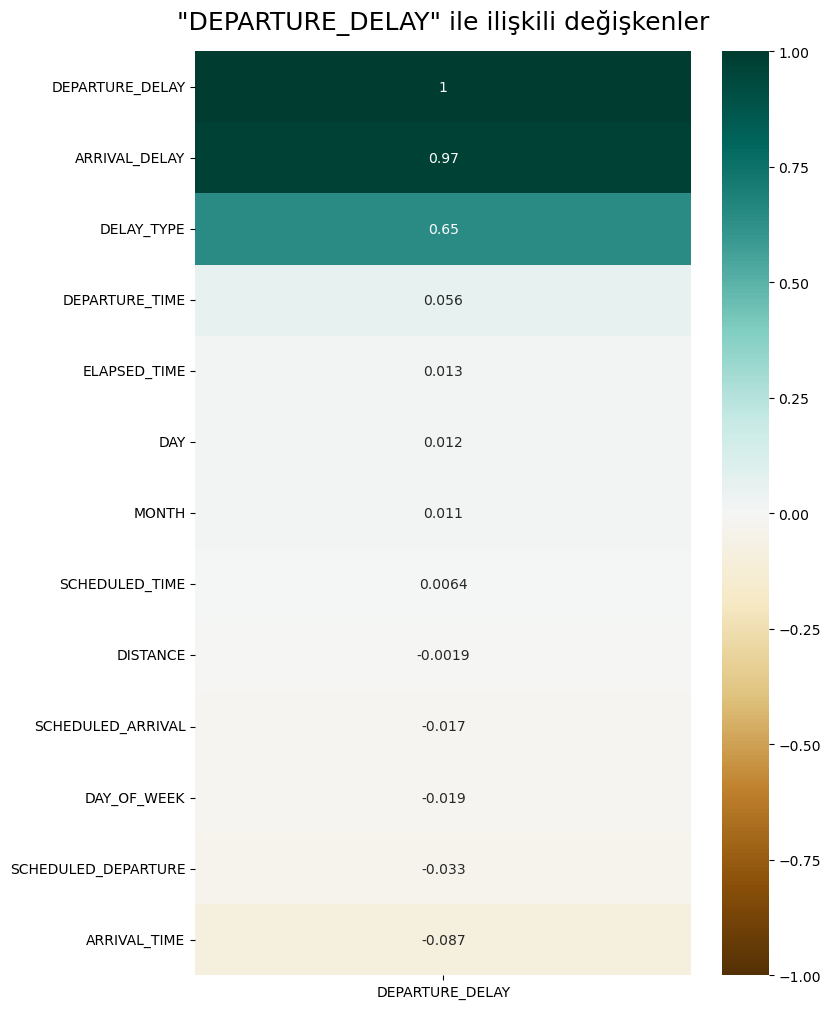

In [35]:
#"DEPARTURE_DELAY" ile ilişkili değişkenlerin belirlenmesi
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(flights.corr()[['DEPARTURE_DELAY']].sort_values(by='DEPARTURE_DELAY', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('"DEPARTURE_DELAY" ile ilişkili değişkenler', fontdict={'fontsize':18}, pad=16);
plt.show()
# plt.savefig('kalkışgecikmesi.png', dpi=300, bbox_inches='tight')


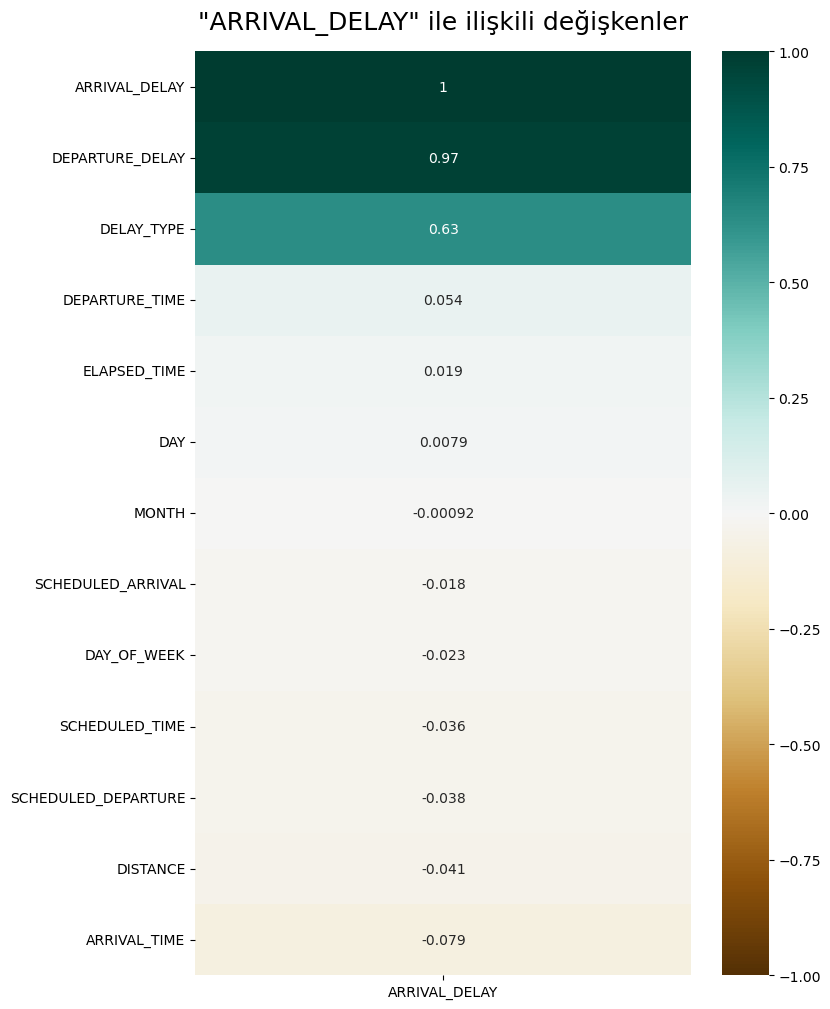

In [36]:
#"ARRIVAL_DELAY" ile ilişkili değişkenlerin belirlenmesi
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(flights.corr()[['ARRIVAL_DELAY']].sort_values(by='ARRIVAL_DELAY', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('"ARRIVAL_DELAY" ile ilişkili değişkenler', fontdict={'fontsize':18}, pad=16);
plt.show()
# plt.savefig('varışgecikmesi.png', dpi=300, bbox_inches='tight')


Verilen 2 korelasyon grafiği gecikmelerle ilişkili değişkenleri sayısal olarak göstermiş olsa da, veri setinin ve durumun tam olarak anlaşılması için seçilen bir kaç değişken üzerinden detaylı analizler yapılacaktır. 

Sonrasında ise havayolu şirketi, havaalanı gibi kategorik değerler üzerinden incelemeler yapılacaktır.

## Gecikmelerin İncelenmesi İçin Fonksiyonların Tanımlanması

In [37]:
def plot_bar(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

In [38]:
def delay_by_attribute_departure(attribute, df=flights, figsize=(10, 7)):
    delay_type = lambda x:((0,1)[x >= 30],2)[x >= 60]
    flights['DELAY_TYPE'] = flights['DEPARTURE_DELAY'].apply(delay_type)
   
    fig = plt.figure(1, figsize=(10,7))
    ax = sns.countplot(y=attribute, hue='DELAY_TYPE', data=flights)
    
    plt.xlabel('Uçuş Sayısı', fontsize=16, weight='bold')
    plt.ylabel(attribute, fontsize=16, weight='bold')
    plt.title(f'{attribute} lara göre kalkış gecikmelerinin dağılımı', weight='bold')
    L = plt.legend()
    
    L.get_texts()[0].set_text('az gecikme (15 < t < 30 min)')
    L.get_texts()[1].set_text('orta gecikme (30 <= t < 60 min)')
    L.get_texts()[2].set_text('büyük gecikme (t >= 60 min)')

    plt.grid(True)
    plt.show()

In [39]:
def delay_by_attribute_arrival(attribute, df=flights, figsize=(10, 7)):
    delay_type = lambda x:((0,1)[x >= 30],2)[x >= 60]
    flights['DELAY_TYPE'] = flights['ARRIVAL_DELAY'].apply(delay_type)
    
    fig = plt.figure(1, figsize=(10,7))
    ax = sns.countplot(y=attribute, hue='DELAY_TYPE', data=flights)
    
    plt.xlabel('Uçuş Sayısı', fontsize=16, weight='bold')
    plt.ylabel(attribute, fontsize=16, weight='bold')
    plt.title(f'{attribute} lara göre varış gecikmelerinin dağılımı', weight='bold')
    L = plt.legend()
    
    L.get_texts()[0].set_text('az gecikme (15 < t < 30 min)')
    L.get_texts()[1].set_text('orta gecikme (30 <= t < 60 min)')
    L.get_texts()[2].set_text('büyük gecikme (t >= 60 min)')

    plt.grid(True)
    plt.show()

## Genel Görünüm

## Aylara göre Uçuşların ve Gecikmelerin İncelenmesi

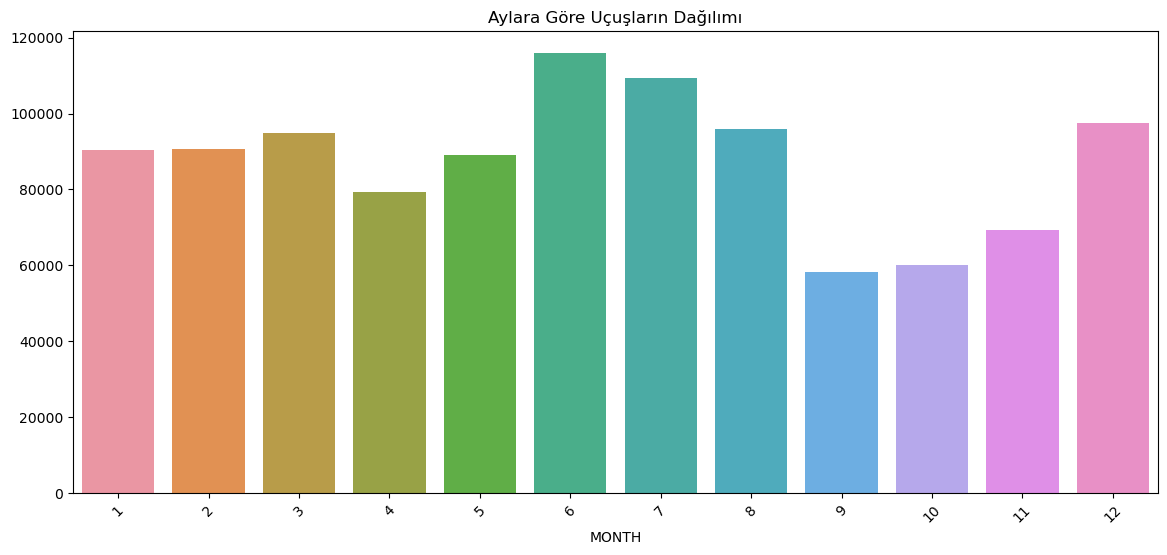

In [40]:
plot_bar(flights.value_counts('MONTH'), 'Aylara Göre Uçuşların Dağılımı')

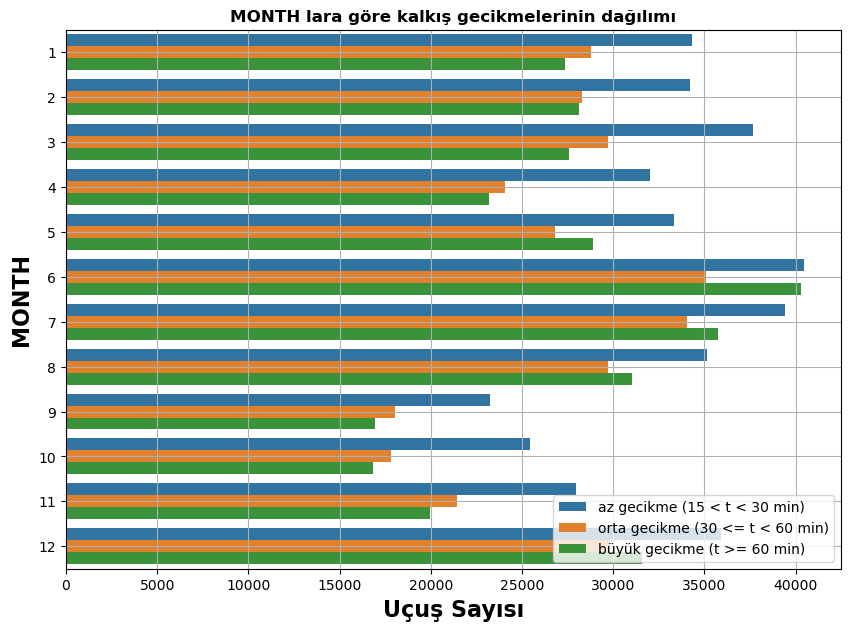

In [41]:
delay_by_attribute_departure('MONTH')

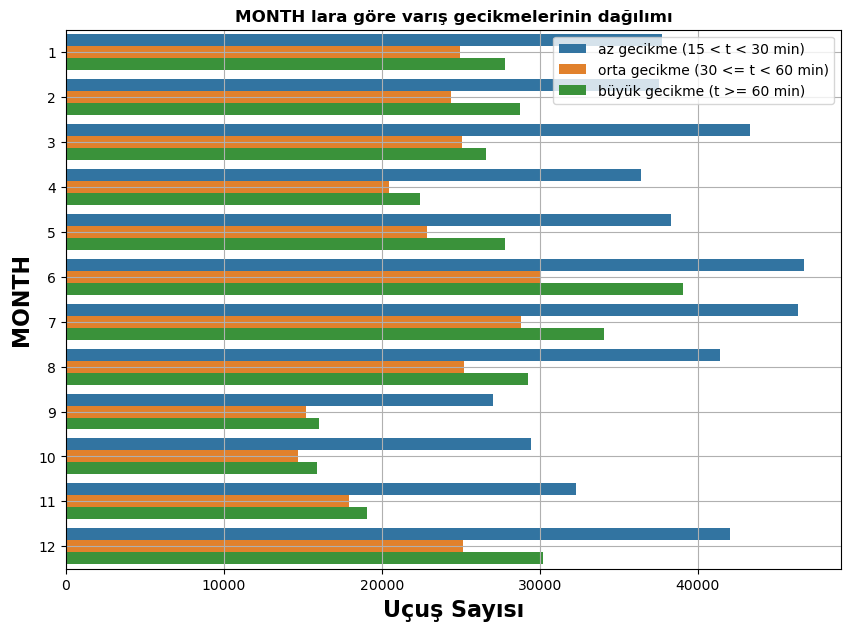

In [42]:
delay_by_attribute_arrival('MONTH')

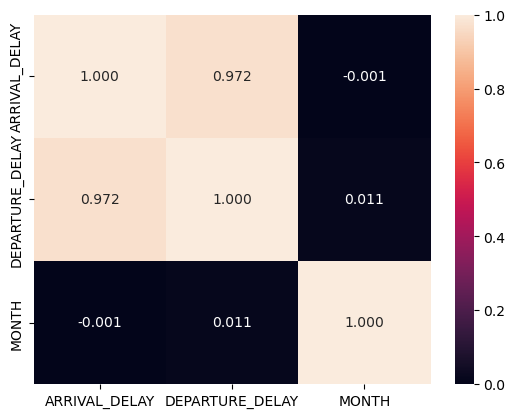

In [43]:
sns.heatmap(flights[['ARRIVAL_DELAY','DEPARTURE_DELAY', 'MONTH']].corr(), annot=True, fmt='.3f')
plt.show()

Oluşturulan uçuş dağılımlarına bakıldığında yaz döneminde uçuş sayılarında bir artış olsa da genel olarak aylar ve mevsimler arasında anlamlı bir fark olmadığı görülmektedir.

Buna paralel olarak kalkış ve varış gecikmelerinin dağılımlarında da aylar ve mevsimler arasında belirli farklılıklar olsa da dikkate alınması gereken büyüklükte farklar görünmemektedir, bu durum uçuş sayısıyla ilişkilendirilebilir.

Son olarak kalkış ve varış gecikmeleri ile aylar arasındaki korelasyona bakıldığında değişkenler arasında bir ilişki bulunmadığı görülmektedir. Yani oluşan gecikmelerin aylarla hernagi bir ilişkisi olmadığı söylenebilir. 

## Ayın ve Haftanın Günlerine göre Uçuşların ve Gecikmelerin İncelenmesi

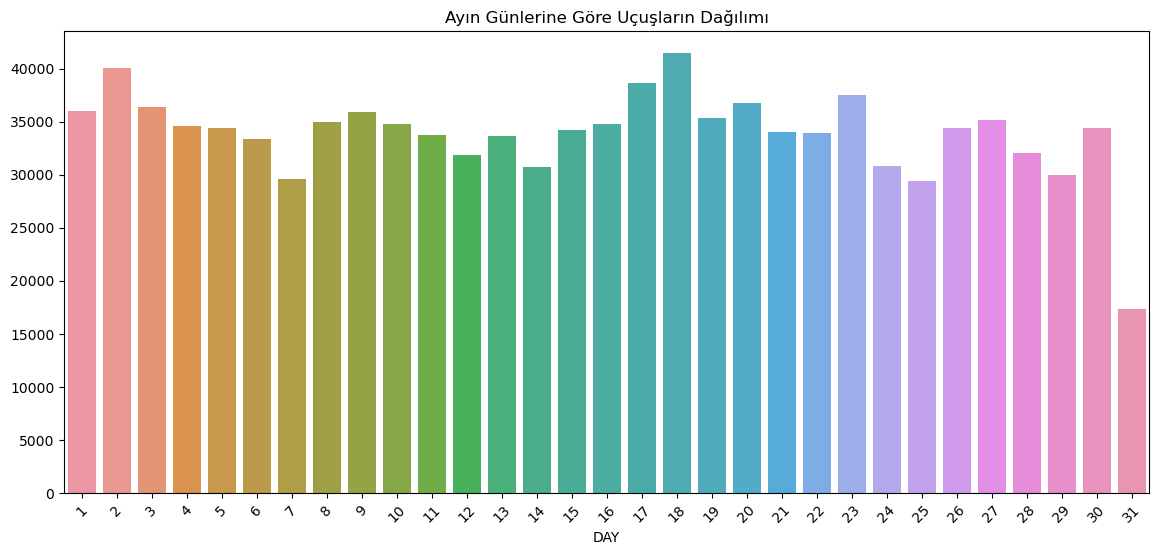

In [44]:
plot_bar(flights.value_counts('DAY'), 'Ayın Günlerine Göre Uçuşların Dağılımı')

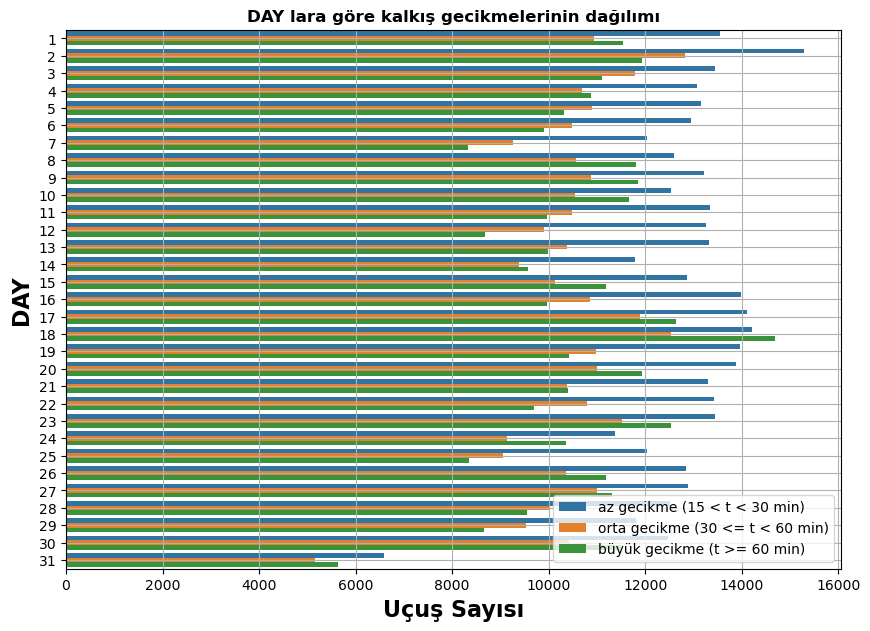

In [45]:
delay_by_attribute_departure('DAY')

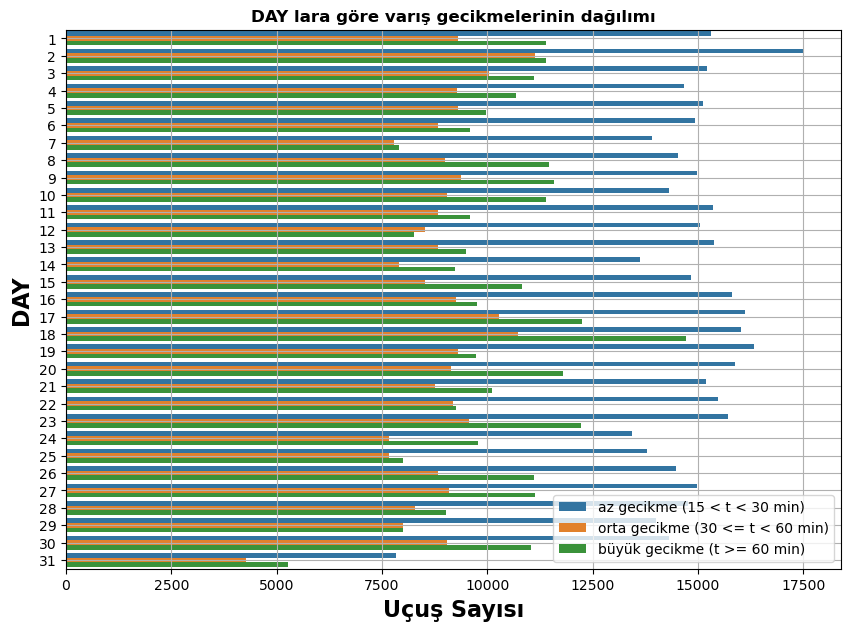

In [46]:
delay_by_attribute_arrival('DAY')

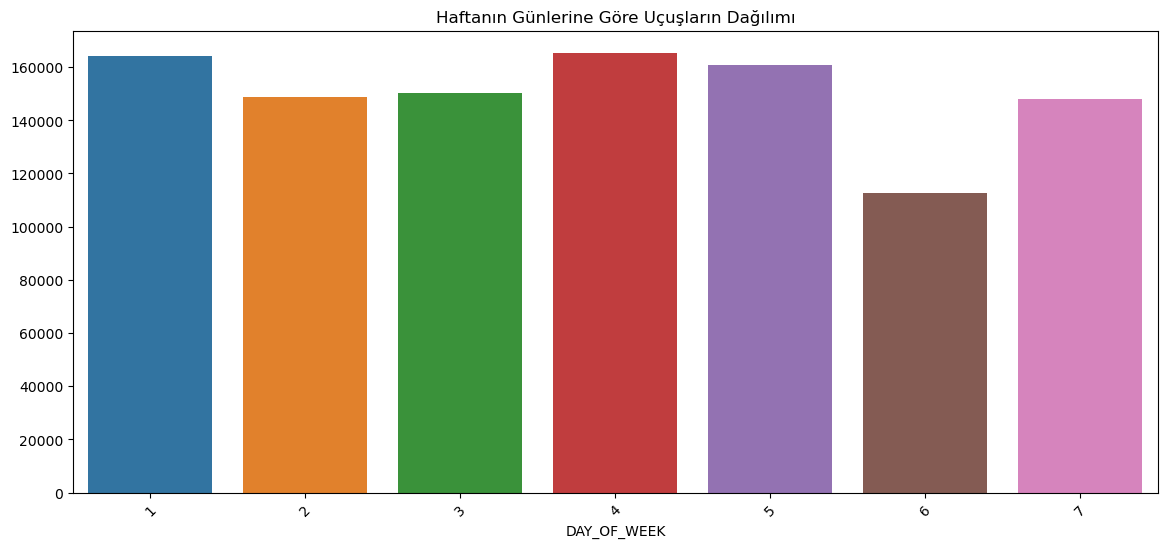

In [47]:
plot_bar(flights.value_counts('DAY_OF_WEEK'), 'Haftanın Günlerine Göre Uçuşların Dağılımı')

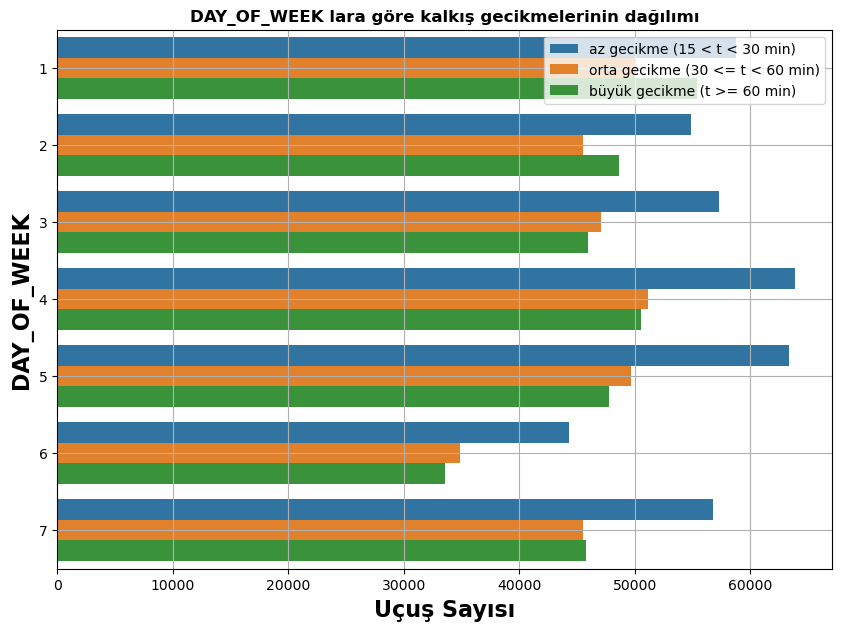

In [48]:
delay_by_attribute_departure('DAY_OF_WEEK')

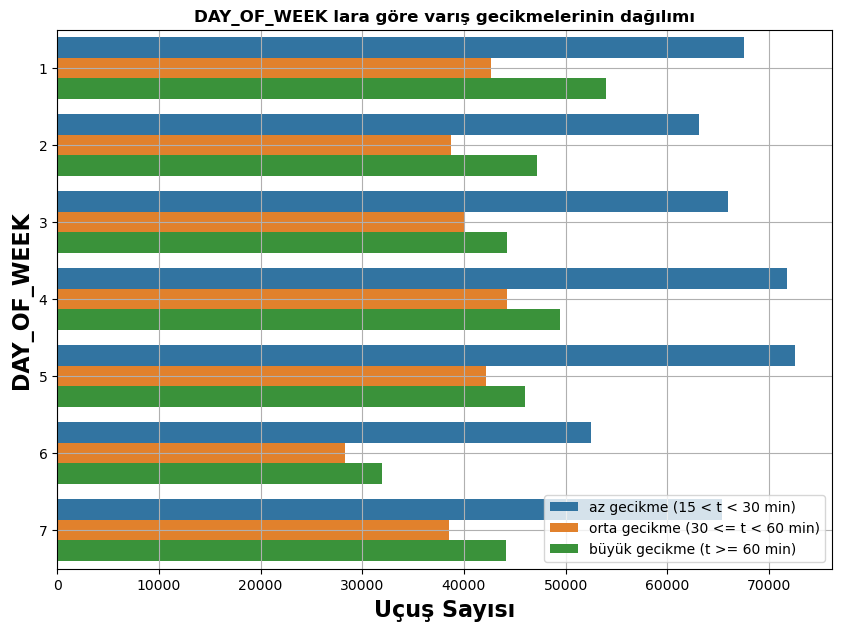

In [49]:
delay_by_attribute_arrival('DAY_OF_WEEK')

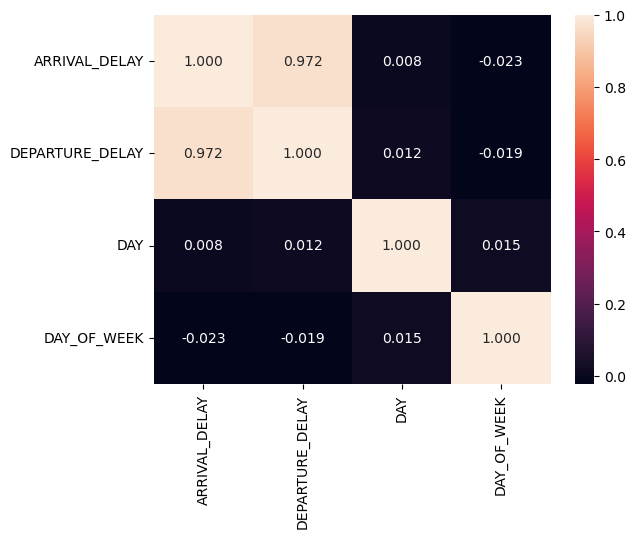

In [50]:
sns.heatmap(flights[['ARRIVAL_DELAY','DEPARTURE_DELAY', 'DAY', 'DAY_OF_WEEK']].corr(), annot=True, fmt='.3f');
plt.show()

Her ayın 31. günü olmadığı düşünülerek ayın günlerine göre olan dağılım değerlendirildiğinde ayın günleri arasındaki uçuş dağılımlarında dikkate alınması gereken farklılıklar gözlenmemektedir.

Kalkış ve varış gecikmelerinin dağılımlarında da ayın günlerine göre bir farklılık bulunmamaktadır. 

Bu duruma uygun şekilde haftanın günlerine göre uçuş sayısı dağılımları ve gecikme dağılımları da uyumludur.

Ayın ve haftanın günleri ve kaalkış ve varış gecikmeleri arasındaki ilişki korelasyon grafiğiyle incelendiğinde; aylara göre dağılımda olduğu gibi bu değişkenler arasında herhangi bir bağlantı bulunmadığı gözlenmiştir.

Benzer şekilde diğer sayısal değişkenlerden biri olan mesafe değişkeni üzerinden de aynı dağılımlar incelenebilir. 

## Havaalanlarındaki Uçuş Yoğunluğunun Dağılımının İncelenmesi

### Kalkış Havaalanlarındaki Uçuş Yoğunluğunun Dağılımı

In [51]:
#plot_bar(flights.value_counts('ORIGIN_AIRPORT'), 'Kalkış Havaalanlarındaki Uçuş Yoğunluğunun Dağılımı')

In [52]:
#delay_by_attribute_departure('ORIGIN_AIRPORT')

In [53]:
#kalkış havaalanlarında gerçekleşen uçuş sayısı
flights.groupby(['ORIGIN_AIRPORT'])['ORIGIN_AIRPORT'].count().sort_values(ascending=False)

ORIGIN_AIRPORT
ORD      67255
ATL      61375
DFW      51139
DEN      44142
LAX      40646
         ...  
13127        1
12016        0
11503        0
10268        0
13502        0
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

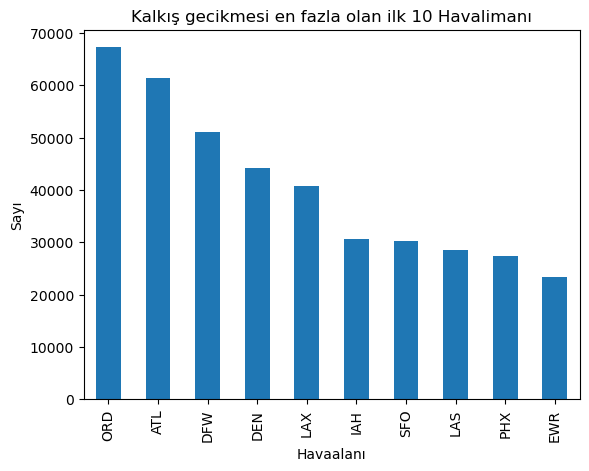

In [54]:
yogun_kalkis_hv = flights[flights['DEPARTURE_DELAY'].notnull()]
yogun_kalkis_hv = yogun_kalkis_hv[yogun_kalkis_hv['ORIGIN_AIRPORT'].notnull()]
yogun_kalkis_hv = yogun_kalkis_hv[['DEPARTURE_DELAY','ORIGIN_AIRPORT']]
yogun_kalkis_hv = yogun_kalkis_hv['ORIGIN_AIRPORT']
yogun_kalkis_hv.value_counts()[:10].plot.bar(xlabel="Havaalanı", ylabel="Sayı",title = 'Kalkış gecikmesi en fazla olan ilk 10 Havalimanı')
plt.show()

Hartsfield-jackson Atlanta Uluslararası Havaalanı ve Chicago O'Hare Uluslararası Havaalanı'ndan yapılan uçuşlarda daha fazla Kalkış gecikmesi var. 

### Varış Havaalanlarındaki Uçuş Yoğunluğunun Dağılımı

In [55]:
#plot_bar(flights.value_counts('DESTINATION_AIRPORT'), 'Varış Havaalanlarındaki Uçuş Yoğunluğunun Dağılımı')

In [56]:
#delay_by_attribute_arrival('DESTINATION_AIRPORT')

In [57]:
#amount of flights for each airline:
flights.groupby(['DESTINATION_AIRPORT'])['DESTINATION_AIRPORT'].count().sort_values(ascending=False).head(10),

(DESTINATION_AIRPORT
 ORD    53038
 ATL    51276
 DFW    40670
 LAX    39601
 DEN    38701
 SFO    35462
 LAS    26018
 IAH    25736
 PHX    24238
 EWR    23079
 Name: DESTINATION_AIRPORT, dtype: int64,)

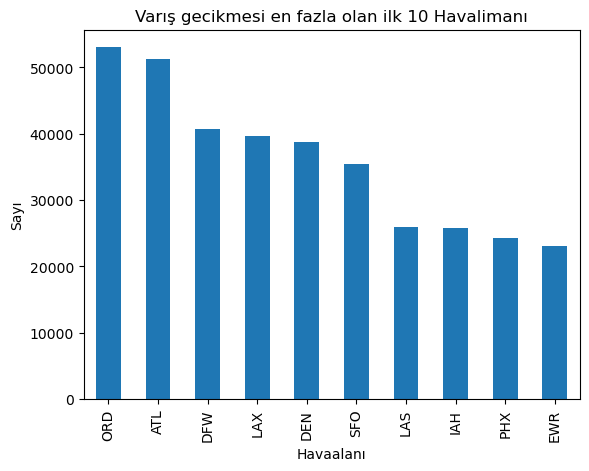

In [58]:
yogun_varis_hv = flights[flights['ARRIVAL_DELAY'].notnull()]
yogun_varis_hv = yogun_varis_hv[['ARRIVAL_DELAY','DESTINATION_AIRPORT']]
yogun_varis_hv = yogun_varis_hv['DESTINATION_AIRPORT']
yogun_varis_hv.value_counts()[:10].plot.bar(xlabel="Havaalanı", ylabel="Sayı",title = 'Varış gecikmesi en fazla olan ilk 10 Havalimanı')
plt.show()

Hartsfield-jackson Atlanta Uluslararası Havalimanı , Chicago O'Hare Uluslararası Havalimanı ve Dallas/fort Worth Uluslararası Havalimanı'nda hem geliş hem de gidiş gecikmelerinin daha fazla olduğunu görüyoruz.

## Havayolu Şirketlerine Göre Uçuş Sayılarının ve Gecikmelerin İncelenmesi

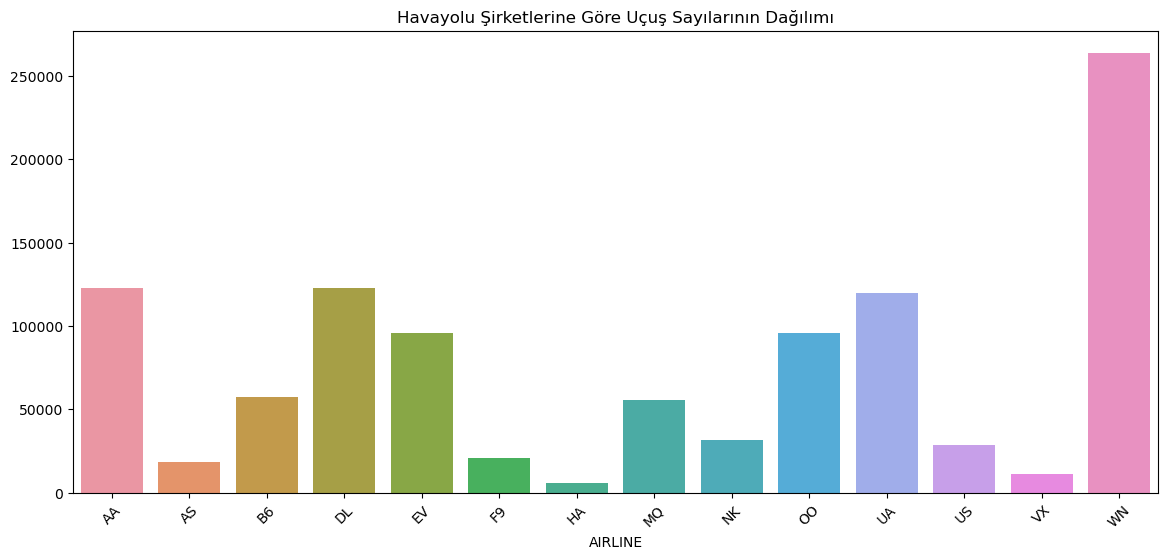

In [59]:
plot_bar(flights.value_counts('AIRLINE'), 'Havayolu Şirketlerine Göre Uçuş Sayılarının Dağılımı')

In [60]:
#flights_fullname = flights.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
#flights_fullname = flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
#flights_fullname = flights.rename(columns={"AIRLINE_y":"AIRLINE"})

def airline_marketshare(data=flights, by='AIRLINE', titlehere='Havayolu Şirketlerinin 2015 Yılı Pazar Pay Dağılımları'):
    df = data.loc[:, [by]]
    df['Pazar Payi %'] = 1
    top = df.groupby(by).sum().sort_values(by='Pazar Payi %',ascending=False)
    top = top.reset_index()
    
    sharePlot = top['Pazar Payi %'].plot.pie(subplots=True,
                                         autopct='%0.2f%%',
                                         fontsize=12,
                                         figsize=(10,10),
                                         legend=False,
                                         labels=top[by],
                                         shadow=False,
                                         explode=(0.01,0.02,0.03,0.04,0.05,0.06,
                                                  0.07,0.08,0.1,0.15,
                                                  0.2,0.25,
                                                  0.3,0.35)[:len(data[by].unique())],
                                         startangle=90,
                                         colormap='Blues',
                                         title=titlehere
                                       )
    
    plt.show()

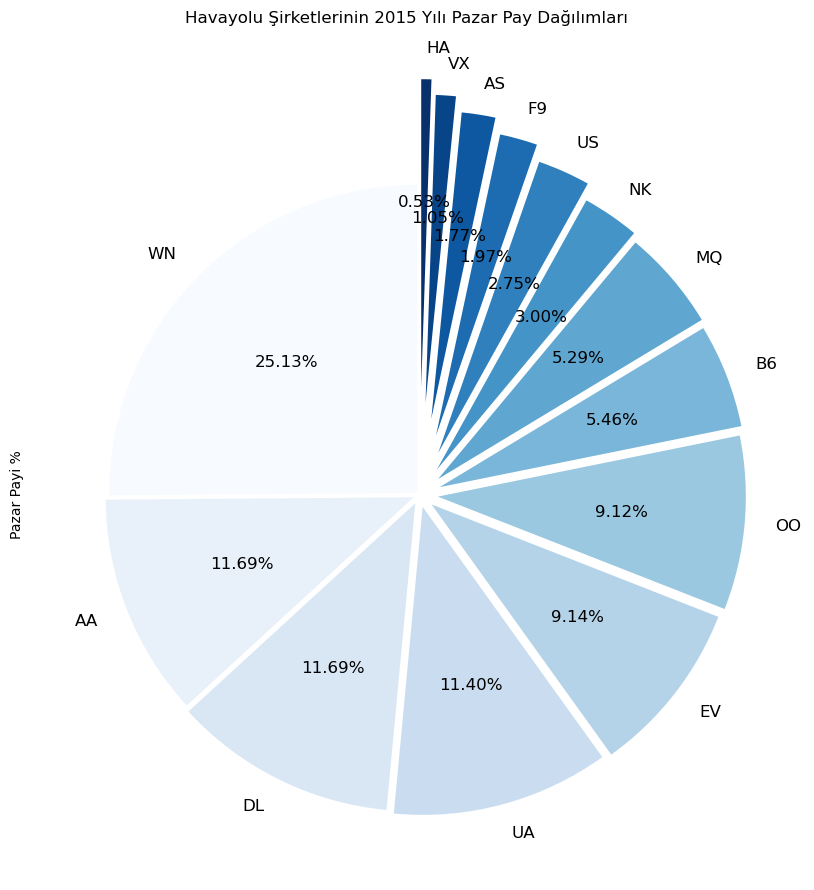

In [61]:
airline_marketshare()

Havayolu başına uçuş yüzdesini veren ilk pasta grafiğine baktığımızda, taşıyıcılar arasında bir miktar eşitsizlik olduğunu görüyoruz. Örneğin Southwest Airlines, uçuşların yaklaşık %20'sini gerçekleştiriyor ve bu da neredeyse en küçük 7 havayolunun düzenlediği uçuş sayısına eşit.

In [62]:
# fig_dim = (8,8)
# f, ax = plt.subplots(figsize=fig_dim)
# quality=flights["AIRLINE"].unique()
# size=flights["AIRLINE"].value_counts()

# plt.pie(size,labels=quality,autopct='%1.0f%%')
# plt.show()

In [63]:
#her havayoluna ait uçuş sayısı
flights.groupby(['AIRLINE'])['AIRLINE'].count().sort_values(ascending=False)

AIRLINE
WN    263932
AA    122808
DL    122803
UA    119794
EV     96033
OO     95839
B6     57364
MQ     55599
NK     31482
US     28939
F9     20709
AS     18560
VX     10989
HA      5571
Name: AIRLINE, dtype: int64

In [64]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [65]:
# Her havayoluna ilişkin istatistiksel bilgiler içeren bir veri çerçevesinin oluşturulması
global_stats = flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
HA,15.0,1433.0,5571.0,46.397236
VX,15.0,644.0,10989.0,57.704978
AS,15.0,963.0,18560.0,52.927101
F9,15.0,1112.0,20709.0,70.307065
US,15.0,759.0,28939.0,54.533121
NK,15.0,836.0,31482.0,64.768471
MQ,15.0,1544.0,55599.0,62.330222
B6,15.0,1006.0,57364.0,61.535894
OO,15.0,1378.0,95839.0,64.749371


In [66]:
# font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
# mpl.rc('font', **font)
# import matplotlib.patches as mpatches
# #__________________________________________________________________
# # I extract a subset of columns and redefine the airlines labeling 
# df2 = flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
# df2['AIRLINE'] = df2['AIRLINE'].replace(abbr_companies)
# #________________________________________________________________________
# colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
#           'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
# #___________________________________
# fig = plt.figure(1, figsize=(16,15))
# gs=GridSpec(2,2)             
# ax1=fig.add_subplot(gs[0,0]) 
# ax2=fig.add_subplot(gs[0,1]) 
# ax3=fig.add_subplot(gs[1,:]) 
# #------------------------------
# # Pie chart nº1: nb of flights
# #------------------------------
# labels = [s for s in  global_stats.index]
# sizes  = global_stats['count'].values
# explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
# patches, texts, autotexts = ax1.pie(sizes, explode = explode,
#                                 labels=labels, colors = colors,  autopct='%1.0f%%',
#                                 shadow=False, startangle=0)
# for i in range(len(abbr_companies)): 
#     texts[i].set_fontsize(14)
# ax1.axis('equal')
# ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
#               color = 'w',fontsize=18)
# #_______________________________________________
# # I set the legend: abreviation -> airline name
# comp_handler = []
# for i in range(len(abbr_companies)):
#     comp_handler.append(mpatches.Patch(color=colors[i],
#             label = global_stats.index[i] + ': ' + abbr_companies[global_stats.index[i]]))
# ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
#            fontsize = 13, bbox_transform=plt.gcf().transFigure)
# #----------------------------------------
# # Pie chart nº2: mean delay at departure
# #----------------------------------------
# sizes  = global_stats['mean'].values
# sizes  = [max(s,0) for s in sizes]
# explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
# patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
#                                 colors = colors, shadow=False, startangle=0,
#                                 autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
# for i in range(len(abbr_companies)): 
#     texts[i].set_fontsize(14)
# ax2.axis('equal')
# ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
#               color='w', fontsize=18)
# #------------------------------------------------------
# # striplot with all the values reported for the delays
# #___________________________________________________________________
# # I redefine the colors for correspondance with the pie charts
# colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
#           'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
# #___________________________________________________________________
# ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
#                     data=df2, linewidth = 0.5,  jitter=True)
# plt.setp(ax3.get_xticklabels(), fontsize=14)
# plt.setp(ax3.get_yticklabels(), fontsize=14)
# ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
#                          for x in ax3.get_xticks()])
# plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
#            color='w', labelpad=20)
# ax3.yaxis.label.set_visible(False)
# #________________________
# plt.tight_layout(w_pad=3) 
# plt.show()

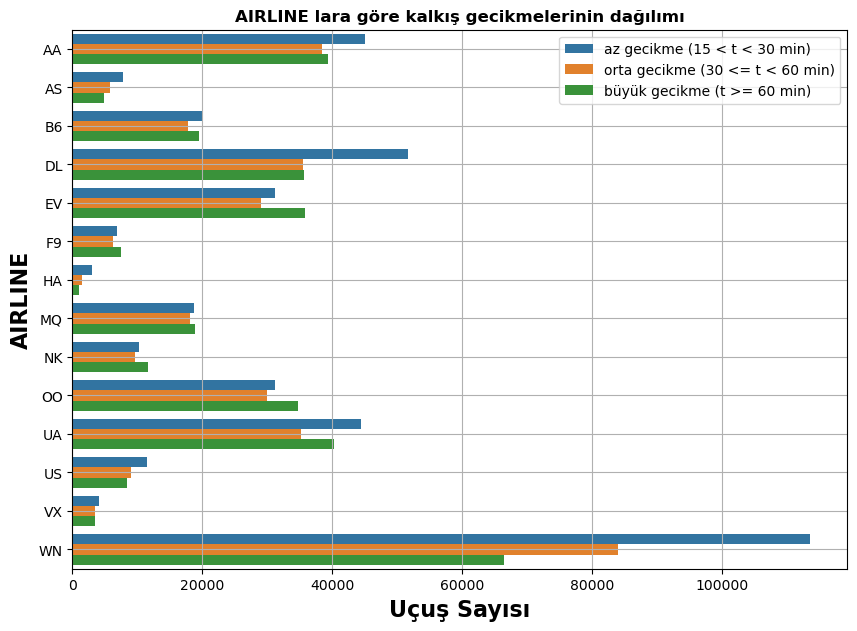

In [67]:
delay_by_attribute_departure('AIRLINE')

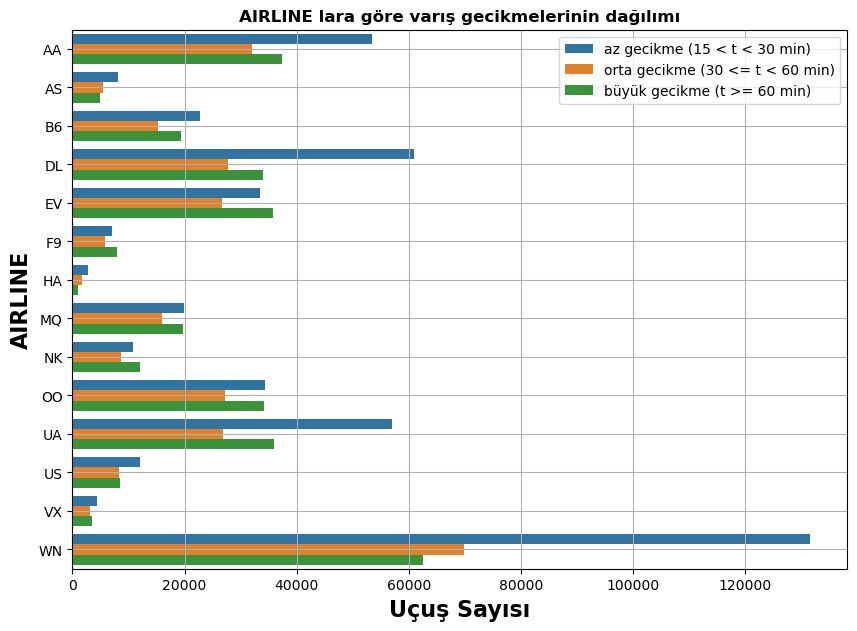

In [68]:
delay_by_attribute_arrival('AIRLINE')

Bu grafikte ise, 30 dakikadan az gecikmelerin, 30 < t < 60 dakika aralığındaki gecikmelerin ve son olarak 60 dakikadan büyük gecikmelerin sayıları verilmiştir.  Gemel olarak havayolundan bağımsız olarak 60 dakikayı aşan rötarların sadece birkaç yüzdelik paya sahip olduğunu görüyoruz. Bununla birlikte, bu üç gruptaki gecikmelerin oranı havayoluna bağlıdır: örnek olarak, SkyWest Havayolları örneğinde, 60 dakikadan uzun gecikmeler, 30 < t < 60 aralığındaki gecikmelere göre yalnızca ∼ 15 daha düşüktür. dk. SoutWest Airlines için işler daha iyi çünkü 60 dakikadan uzun gecikmeler 15 < t < 30 dakika aralığındaki gecikmelerden 4 kat daha az sıklıkta yaşanıyor. Veya UA (United Air Lines Inc.) havayolunun uçuşlarının yaklaşık %50'sinde büyük gecikme varken, DL (Delta Air Lines Inc.) havayolunun uçuşlarının ~%25'inde büyük gecikme var.

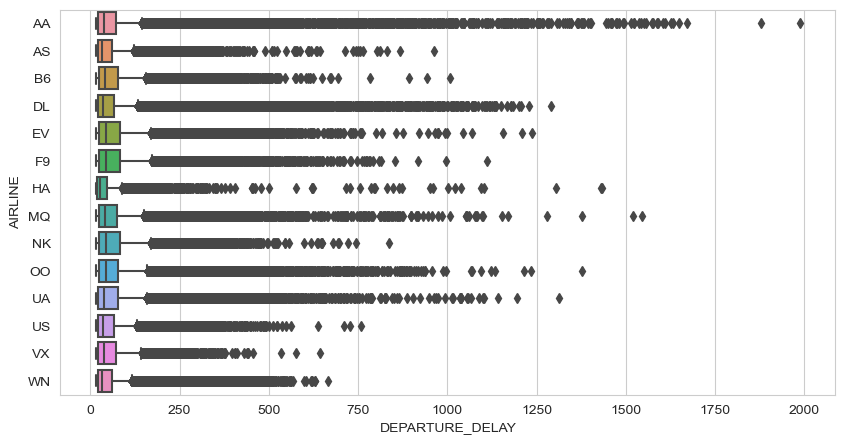

In [69]:
plt.figure(figsize=(10,5),dpi=100  )
sns.set_style("whitegrid") 
sns.boxplot(x = 'DEPARTURE_DELAY', y = 'AIRLINE', data = flights) 
plt.show()

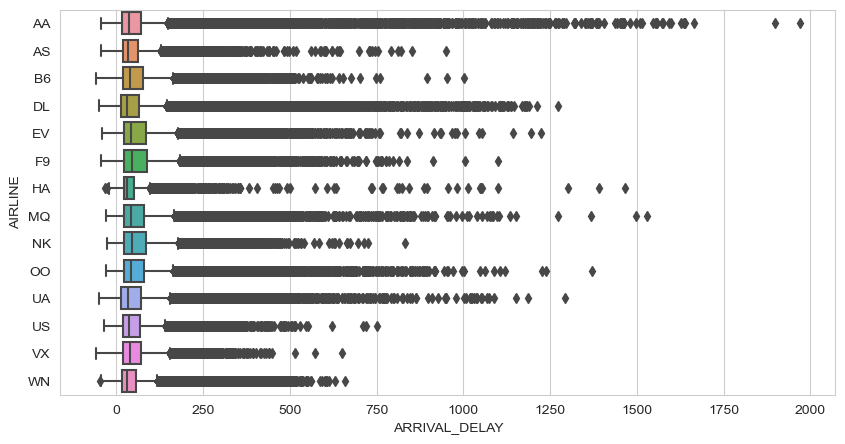

In [70]:
#boxplot for arrival delay
plt.figure(figsize=(10,5),dpi=100  )
sns.set_style("whitegrid") 
sns.boxplot(x = 'ARRIVAL_DELAY', y = 'AIRLINE', data = flights) 
plt.show()

Son derece düşük ortalama gecikmeler bildiren Hawaiian Airlines ve Alaska Airlines hariç, ∼ 60 ± 5 dakikalık bir değerin tüm ortalama gecikmeleri doğru bir şekilde temsil ettiğini elde ettik. Bu değerin oldukça düşük olduğunu unutmayın, bu da her havayolu için standardın programa uymak olduğu anlamına gelir.

Son olarak, alttaki şekil, Ocak 2015'te ölçülen tüm gecikmelerin bir sayımını göstermektedir. Bu gösterim, pasta grafikte görünen göreli homojenliği perspektife yerleştirmektedir. Nitekim tüm ortalama rötarların 50 dakika civarında olmasına rağmen, bu değerin uçuşların büyük çoğunluğunun zamanında kalkmamasının bir sonucu olduğunu görüyoruz.


In [71]:
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()


In [72]:
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = flights[flights['AIRLINE'] == carrier]
    test = df1['ARRIVAL_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

Havalimanlarının sayısı oldukça fazla olduğundan, tüm bilgileri bir kerede gösteren bir grafik, yaklaşık 4400 değeri temsil edeceğinden (yani 312 hava alanı × 14 hava yolu) zor olacaktır. Bu nedenle, verilerin bir alt kümesi temsili oalrak gösterilecektir:

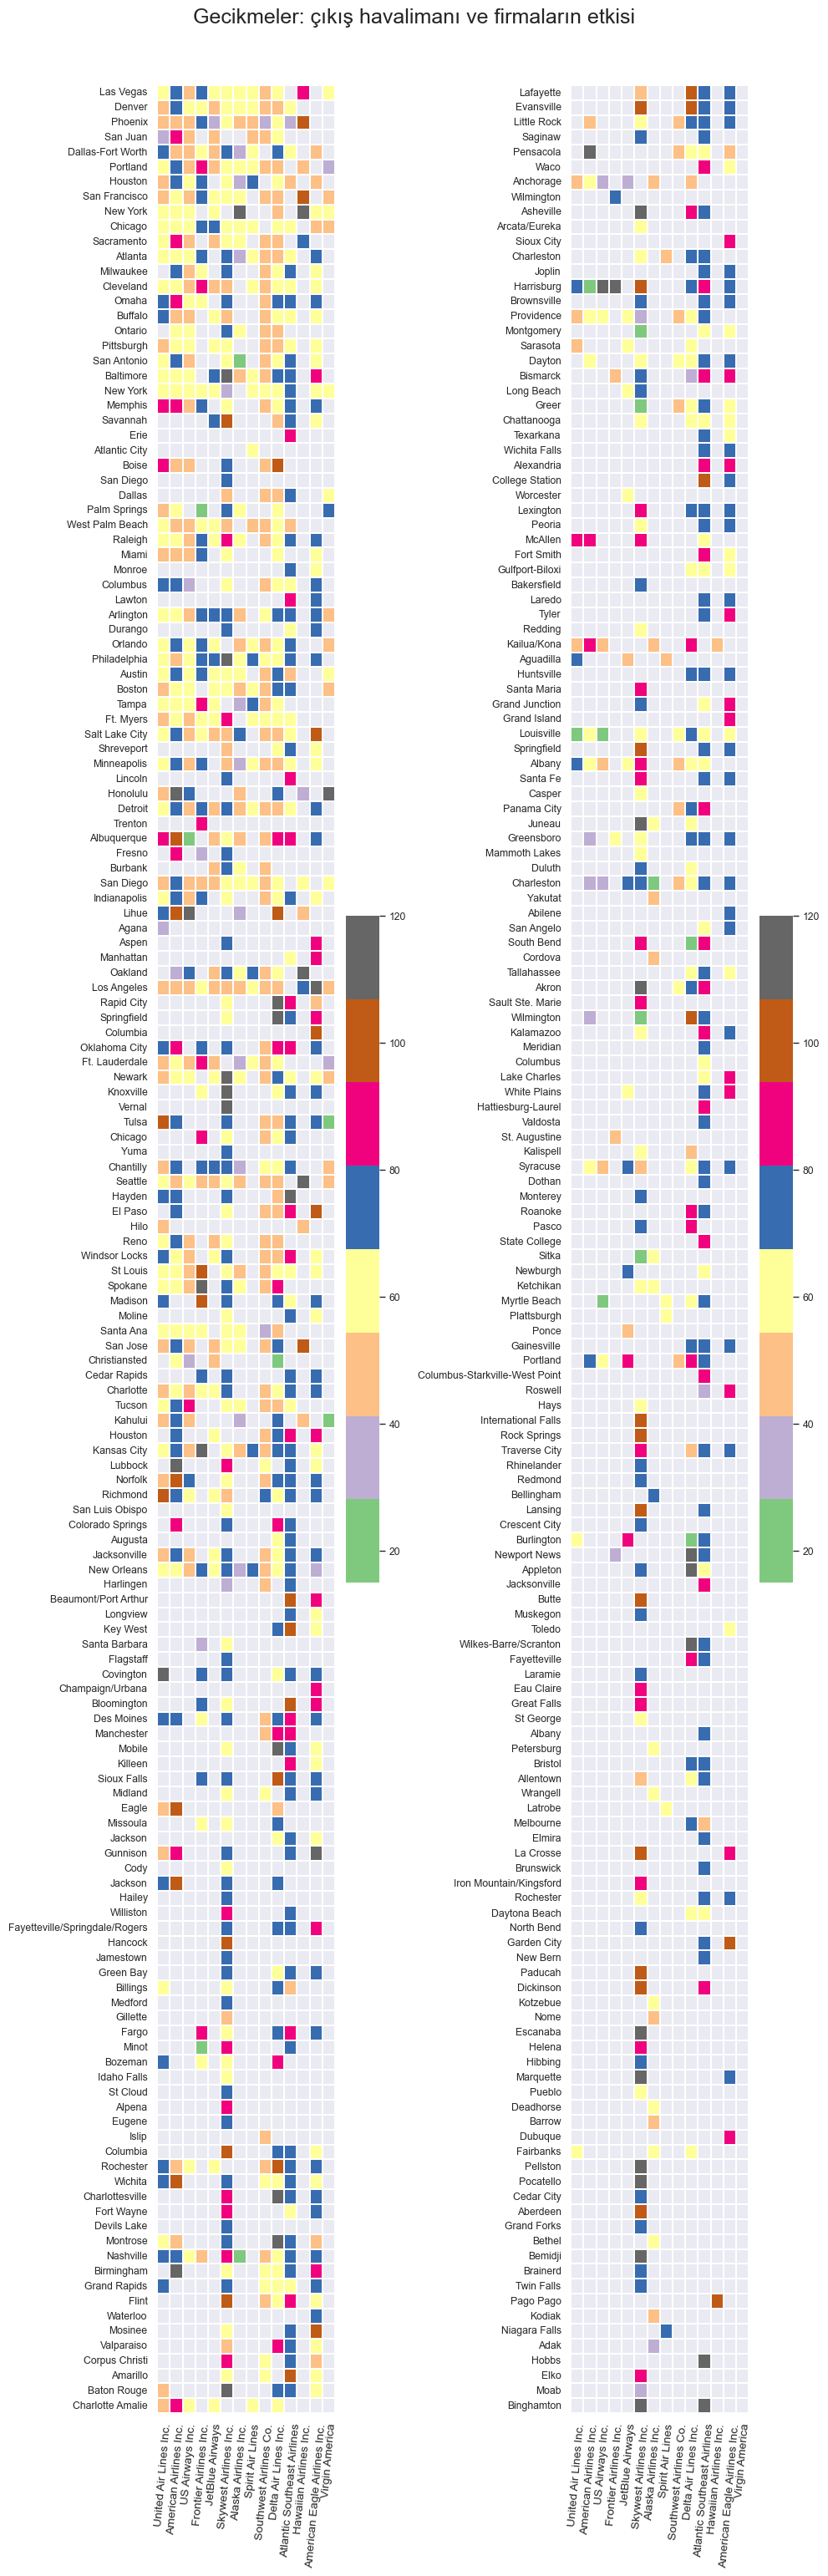

In [73]:

sns.set(context="paper")
fig = plt.figure(1, figsize=(10,30))

ax = fig.add_subplot(1,2,1)
#subset = airport_mean_delays.iloc[:25,:].rename(columns = abbr_companies)
subset = airport_mean_delays.iloc[:156,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 15, vmax = 120)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)  
#subset = airport_mean_delays.iloc[25:50,:].rename(columns = abbr_companies)
subset = airport_mean_delays.iloc[156:312,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Gecikmeler: çıkış havalimanı ve firmaların etkisi", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 15, vmax = 120)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

______________________________________________

## Modelleme İçin Feature Selection

In [74]:
flights.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050422 entries, 20 to 5819078
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   MONTH                1050422 non-null  int64   
 1   DAY                  1050422 non-null  int64   
 2   DAY_OF_WEEK          1050422 non-null  int64   
 3   AIRLINE              1050422 non-null  category
 4   ORIGIN_AIRPORT       1050422 non-null  category
 5   DESTINATION_AIRPORT  1050422 non-null  category
 6   SCHEDULED_DEPARTURE  1050422 non-null  int64   
 7   DEPARTURE_TIME       1050422 non-null  float64 
 8   DEPARTURE_DELAY      1050422 non-null  float64 
 9   SCHEDULED_TIME       1050422 non-null  float64 
 10  ELAPSED_TIME         1050422 non-null  float64 
 11  DISTANCE             1050422 non-null  int64   
 12  SCHEDULED_ARRIVAL    1050422 non-null  int64   
 13  ARRIVAL_TIME         1050422 non-null  float64 
 14  ARRIVAL_DELAY        1050422 non-

In [75]:
# features=['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']
# flights = flights.drop(features,axis=1)

In [76]:
# flights = flights.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', "CANCELLED"],
#                                              axis=1)

In [77]:
flights.corr()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DELAY_TYPE
MONTH,1.000000,0.110866,-0.012948,0.004998,-0.003136,0.011253,0.017312,0.006984,0.021142,-0.015217,-0.014689,-0.000923,-0.015479
DAY,0.110866,1.000000,0.015322,-0.000535,-0.003425,0.012079,0.002972,-0.000366,0.002982,-0.008017,-0.010436,0.007896,-0.001758
DAY_OF_WEEK,-0.012948,0.015322,1.000000,0.016129,0.007549,-0.019032,0.015800,0.012045,0.019040,0.007230,0.002958,-0.022821,-0.029271
SCHEDULED_DEPARTURE,0.004998,-0.000535,0.016129,1.000000,0.815810,-0.033076,-0.033692,-0.040048,-0.027518,0.583173,0.222653,-0.038369,0.012882
DEPARTURE_TIME,-0.003136,-0.003425,0.007549,0.815810,1.000000,0.056261,-0.065545,-0.067035,-0.071644,0.600184,0.322959,0.053816,0.092093
DEPARTURE_DELAY,0.011253,0.012079,-0.019032,-0.033076,0.056261,1.000000,0.006371,0.012832,-0.001861,-0.017007,-0.086625,0.972019,0.628672
SCHEDULED_TIME,0.017312,0.002972,0.015800,-0.033692,-0.065545,0.006371,1.000000,0.978097,0.983383,-0.012687,-0.043955,-0.036194,-0.057896
ELAPSED_TIME,0.006984,-0.000366,0.012045,-0.040048,-0.067035,0.012832,0.978097,1.000000,0.964272,-0.014633,-0.040495,0.019084,0.013818
DISTANCE,0.021142,0.002982,0.019040,-0.027518,-0.071644,-0.001861,0.983383,0.964272,1.000000,-0.024685,-0.061534,-0.040738,-0.061772
SCHEDULED_ARRIVAL,-0.015217,-0.008017,0.007230,0.583173,0.600184,-0.017007,-0.012687,-0.014633,-0.024685,1.000000,0.548179,-0.018343,0.016243


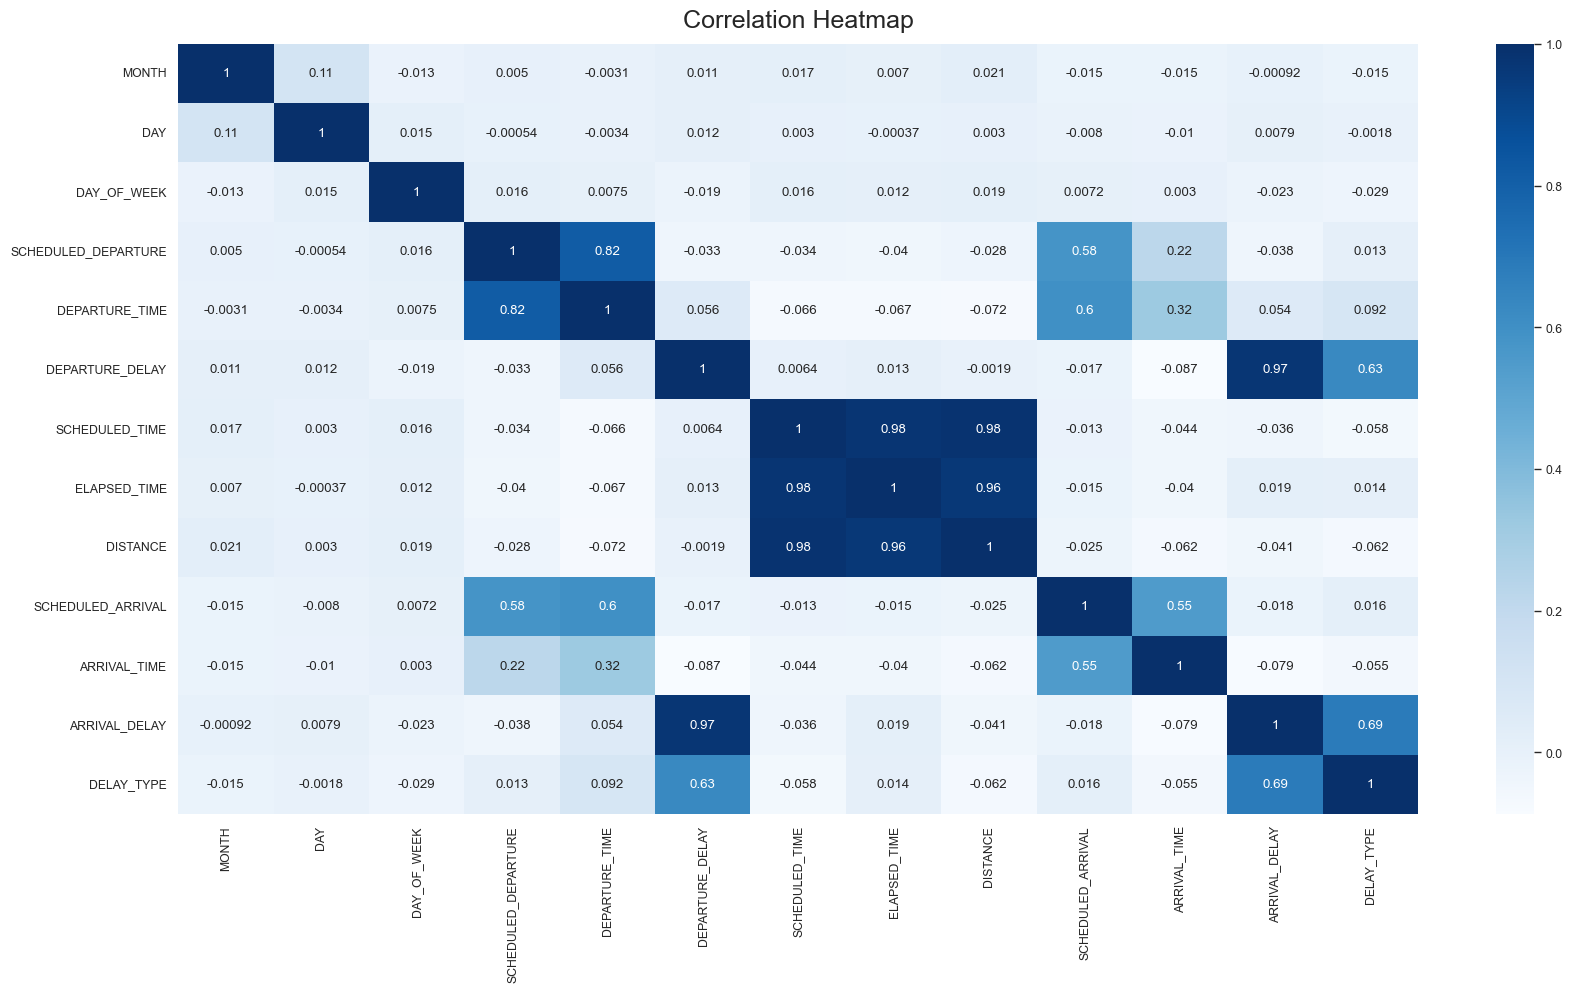

In [78]:
plt.figure(figsize=( 20, 10))

heatmap = sns.heatmap(flights.corr(), annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# save heatmap as .png file
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [79]:
# variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
#                        'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
#                        'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
#                        'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
#                        'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
#flights.drop(variables_to_remove, axis = 1, inplace = True)
flights = flights[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]

In [80]:
flights

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
20,NK,LAS,MCI,55,120.0,25.0,537,543.0,6.0,162.0,143.0
29,AA,DEN,MIA,120,141.0,21.0,707,709.0,2.0,227.0,208.0
30,NK,PHX,ORD,125,237.0,72.0,549,632.0,43.0,204.0,175.0
52,B6,SJU,MCO,400,535.0,95.0,605,730.0,85.0,185.0,175.0
55,B6,SJU,BDL,438,550.0,72.0,739,908.0,89.0,241.0,258.0
...,...,...,...,...,...,...,...,...,...,...,...
5819051,AS,SEA,MSP,2355,11.0,16.0,507,535.0,28.0,192.0,204.0
5819069,B6,LAS,JFK,2359,238.0,159.0,741,1020.0,159.0,282.0,282.0
5819071,B6,SLC,MCO,2359,15.0,16.0,608,625.0,17.0,249.0,250.0
5819073,B6,ABQ,JFK,2359,15.0,16.0,546,549.0,3.0,227.0,214.0


In [81]:
flights.columns

Index(['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME',
       'ELAPSED_TIME'],
      dtype='object')

In [82]:
# To check the Distribution of Air Time
# sns.distplot(flights)
# plt.show()

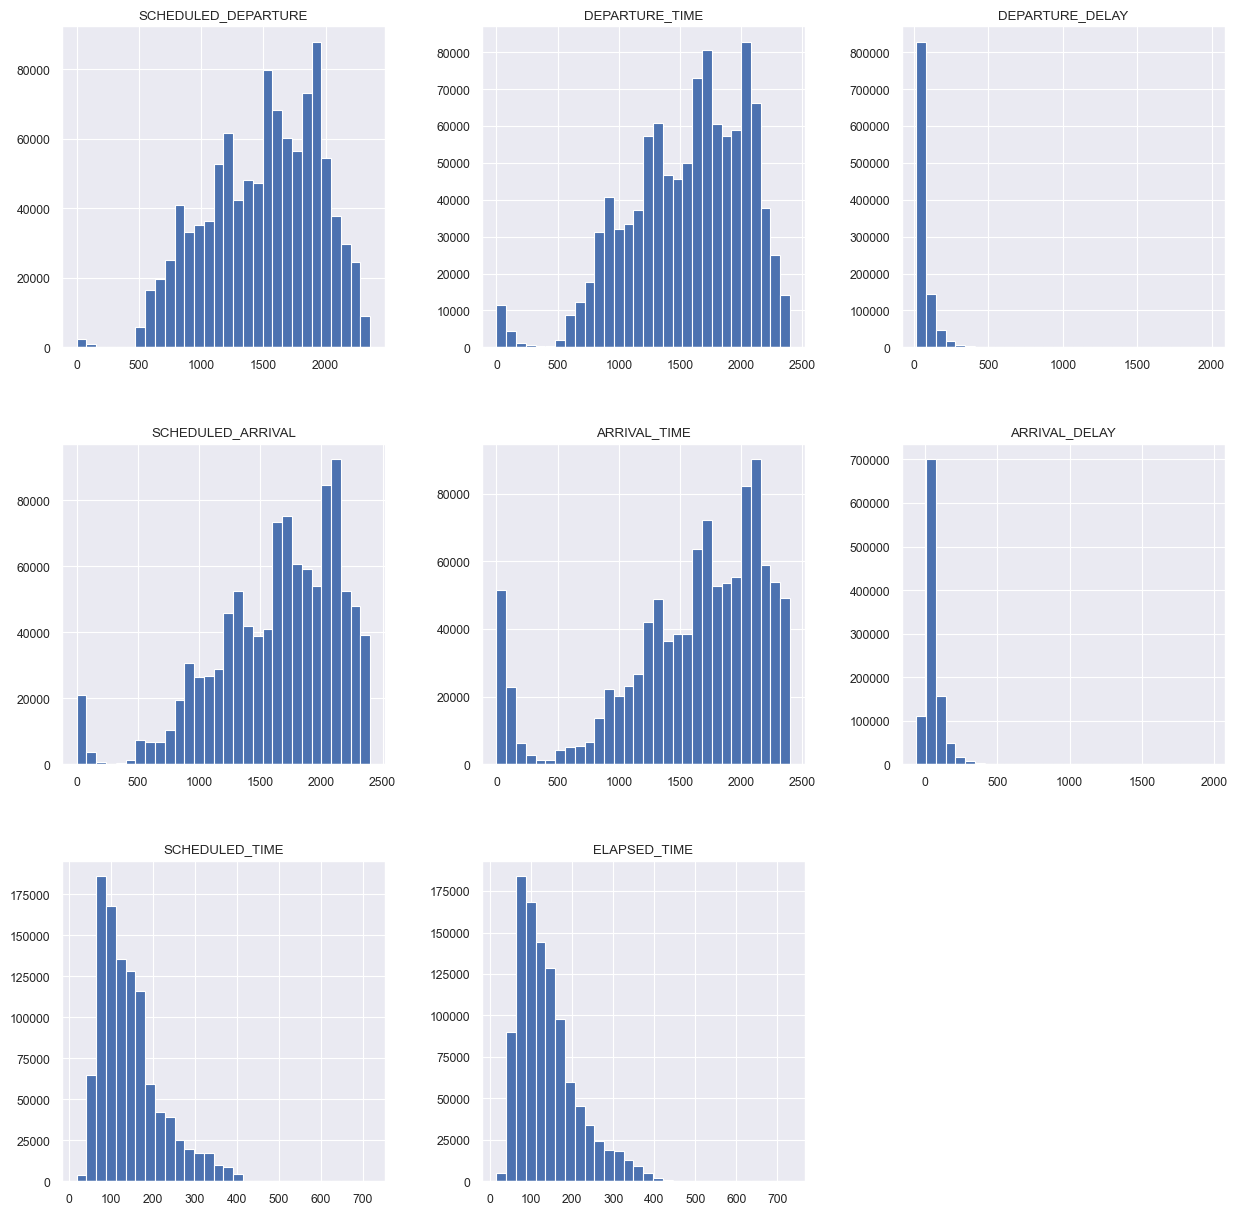

In [83]:
flights.hist(bins = 30, figsize = (15,15), color = 'b')
plt.show()

_________________________________________________________________

## Makine Öğrenmesi Metodlarıyla Tahminleme

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [85]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

#### Kaynakça : https://scikit-learn.org/stable/user_guide.html

Lasso (en az mutlak büzülme ve seçim operatörü; ayrıca Lasso veya LASSO), ortaya çıkan istatistiksel modelin tahmin doğruluğunu ve yorumlanabilirliğini geliştirmek için hem değişken seçimi hem de düzenlileştirme gerçekleştiren bir regresyon analizi yöntemidir.

Doğrusal regresyon, skaler bir yanıt ile bir veya daha fazla açıklayıcı değişken (bağımlı ve bağımsız değişkenler olarak da bilinir) arasındaki ilişkiyi modellemek için doğrusal bir yaklaşımdır.

Ridge regresyonu, çoklu bağlantıdan muzdarip herhangi bir veriyi analiz etmek için kullanılan bir model ayarlama yöntemidir. Bu yöntem, L2 düzenlemesini gerçekleştirir. Çoklu bağlantı sorunu ortaya çıktığında, en küçük kareler yansızdır ve varyanslar büyüktür, bu, tahmin edilen değerlerin gerçek değerlerden çok uzakta olmasına neden olur.

Karar Ağacı, akış şeması benzeri bir ağaç yapısı kullanan veya sonuçlar, girdi maliyetleri ve fayda da dahil olmak üzere tüm olası sonuçların ve kararların bir modeli olan bir karar verme aracıdır.

AdaBoost regresörü, orijinal veri kümesine bir regresör yerleştirerek başlayan ve ardından aynı veri kümesine regresörün ek kopyalarını yerleştiren, ancak örneklerin ağırlıklarının mevcut tahminin hatasına göre ayarlandığı bir meta-tahmin edicidir. Bu nedenle, sonraki regresörler daha çok zor durumlara odaklanır.

Torbalama regresörü, temel regresörleri orijinal veri kümesinin rasgele alt kümelerine yerleştiren ve ardından nihai bir tahmin oluşturmak için bireysel tahminlerini (oylama veya ortalama alarak) toplayan bir topluluk meta-tahmincisidir. Böyle bir meta-tahmin edici, tipik olarak, bir kara kutu tahmin edicisinin (örneğin, bir karar ağacı) varyansını azaltmanın bir yolu olarak, yapım prosedürüne rasgeleleştirmeyi dahil ederek ve ardından bundan bir topluluk oluşturarak kullanılabilir.

In [86]:
le = LabelEncoder()

In [87]:
# Kategorik değişkenleri sayısal olana dönüştürmek için etiket kodlama 
flights['AIRLINE']= le.fit_transform(flights['AIRLINE'])
flights['ORIGIN_AIRPORT'] = le.fit_transform(flights['ORIGIN_AIRPORT'])
flights['DESTINATION_AIRPORT'] = le.fit_transform(flights['DESTINATION_AIRPORT'])

In [88]:
X = flights.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(1050422, 10)

In [89]:
y = flights['ARRIVAL_DELAY']
y.head()

20     6.0
29     2.0
30    43.0
52    85.0
55    89.0
Name: ARRIVAL_DELAY, dtype: float64

In [90]:
# training ve test veri setlerini ayırma
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [91]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

### Model fitting ve sonuçlar

In [92]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 6.5616011731794694
Mean Squared Error: 92.5537243324849
Root Mean Squared Error: 9.620484620458832
R2 :  0.9796133636669103

Linear Regression
Mean Absolute Error: 1.171746362222105e-13
Mean Squared Error: 3.307328887463935e-26
Root Mean Squared Error: 1.8186063035918288e-13
R2 :  1.0

Ridge
Mean Absolute Error: 0.0006677719559795821
Mean Squared Error: 9.578576021005984e-07
Root Mean Squared Error: 0.0009787019986188842
R2 :  0.9999999997890144

Random forest Regressor
Mean Absolute Error: 1.5927324538995389
Mean Squared Error: 14.537500753664396
Root Mean Squared Error: 3.8128074634925375
R2 :  0.9967978518077533

Decision Tree Regressor
Mean Absolute Error: 0.6999674416981092
Mean Squared Error: 5.695829460503227
Root Mean Squared Error: 2.3865936940550285
R2 :  0.9987453902620986

Boosted Linear
Mean Absolute Error: 7.048807522938558e-14
Mean Squared Error: 9.793282592961399e-27
Root Mean Squared Error: 9.89610155210697e-14
R2 :  1.0

Boosted Lasso
Mean A

### Model Analizi

Lasso


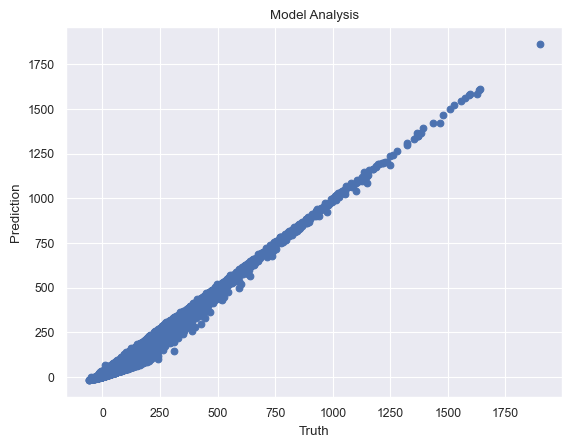

Linear Regression


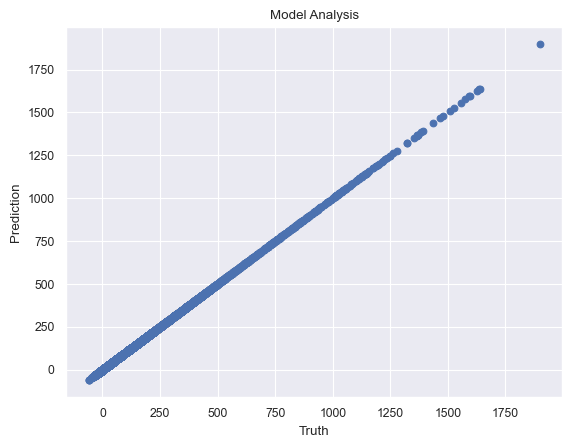

Ridge


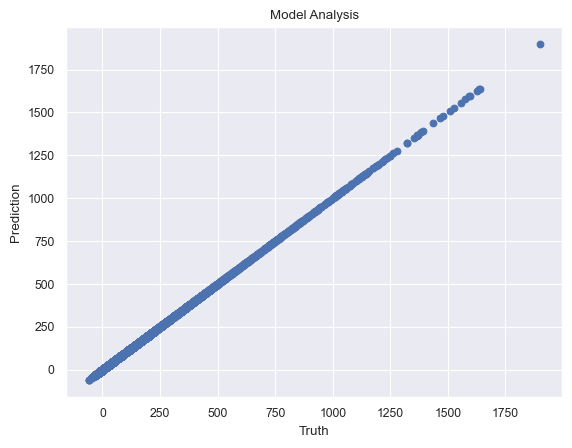

Random forest Regressor


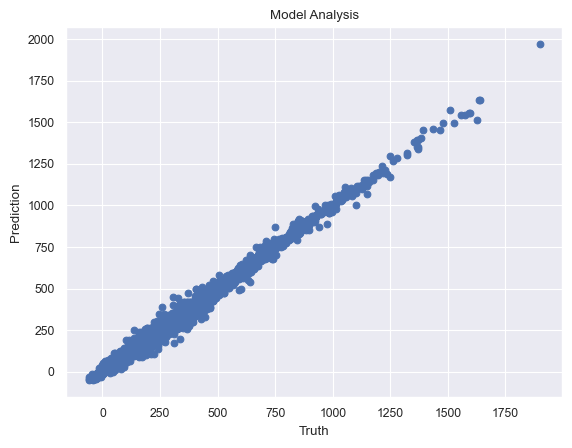

Decision Tree Regressor


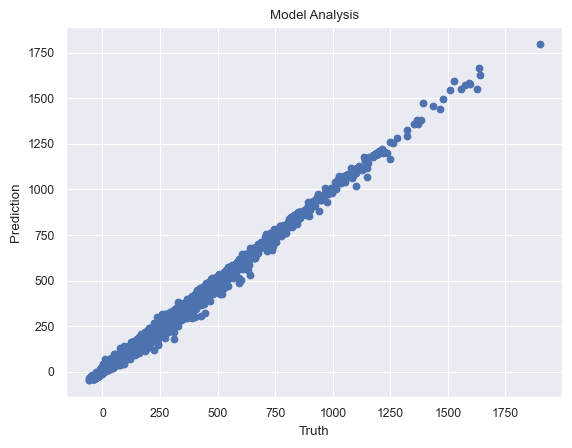

Boosted Linear


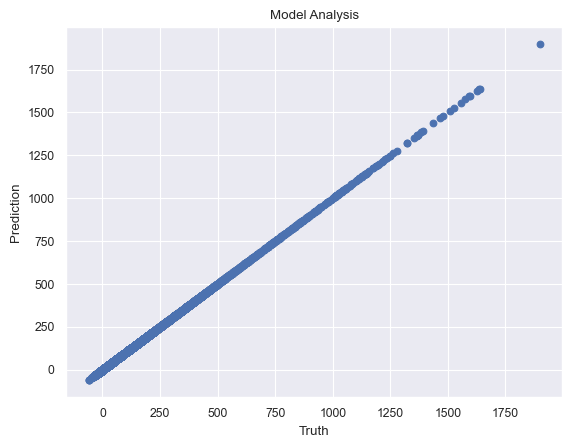

Boosted Lasso


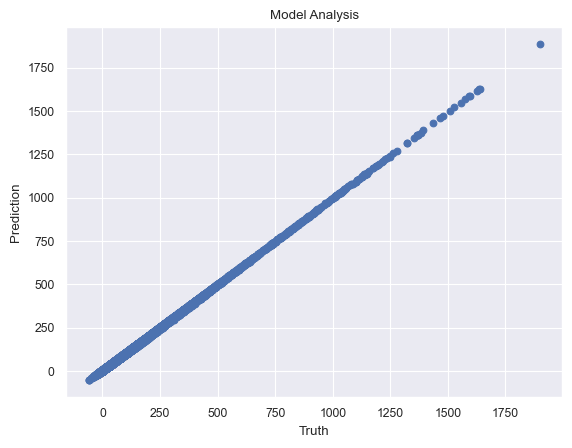

Boosted Ridge


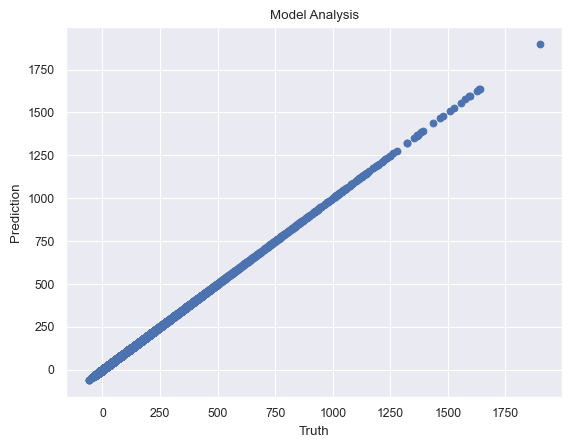

Bagged Linear


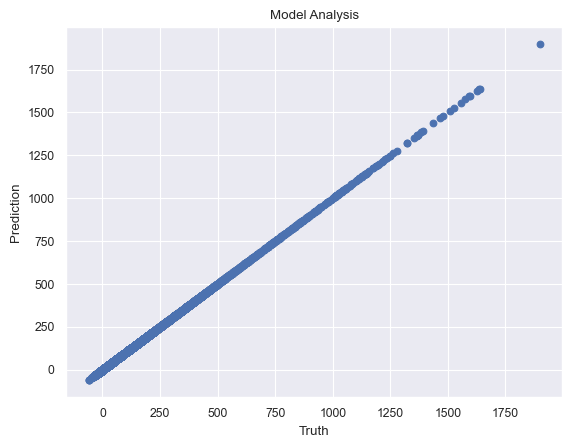

Bagged Lasso


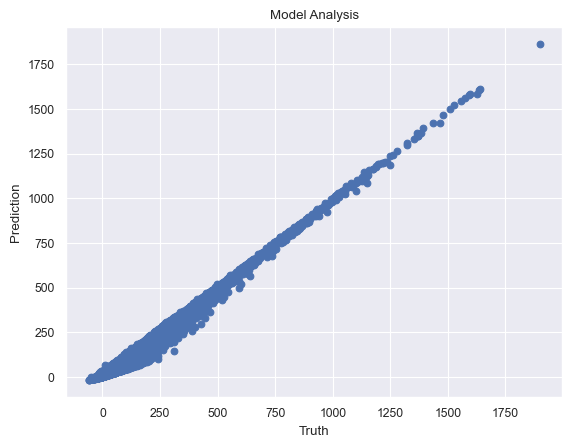

Bagged Ridge


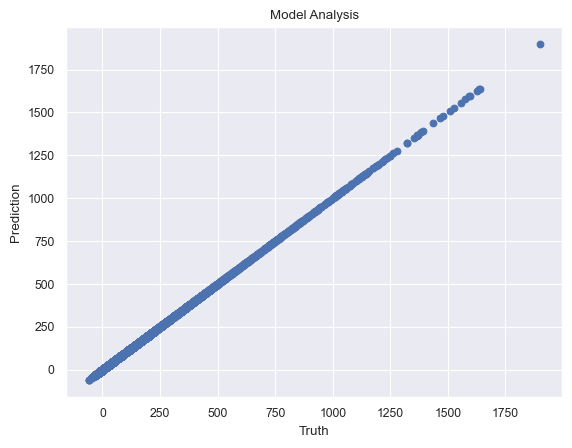

In [93]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

In [94]:
data = [] 
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc),
    data.extend(Y_predict)
    print(name)
    print(data)

Lasso
[array([ 92.98667596,  71.28718693, 167.67610852, ...,  10.36708867,
        25.27528164,  32.71386812])]
Linear Regression
[array([ 92.98667596,  71.28718693, 167.67610852, ...,  10.36708867,
        25.27528164,  32.71386812]), array([ 89.,  71., 165., ...,   7.,  20.,  46.])]
Ridge
[array([ 92.98667596,  71.28718693, 167.67610852, ...,  10.36708867,
        25.27528164,  32.71386812]), array([ 89.,  71., 165., ...,   7.,  20.,  46.]), array([ 89.00035989,  71.00000176, 165.00025115, ...,   7.00034096,
        20.00049526,  45.99866575])]
Random forest Regressor
[array([ 92.98667596,  71.28718693, 167.67610852, ...,  10.36708867,
        25.27528164,  32.71386812]), array([ 89.,  71., 165., ...,   7.,  20.,  46.]), array([ 89.00035989,  71.00000176, 165.00025115, ...,   7.00034096,
        20.00049526,  45.99866575]), array([ 91.,  71., 162., ...,   7.,  20.,  48.])]
Decision Tree Regressor
[array([ 92.98667596,  71.28718693, 167.67610852, ...,  10.36708867,
        25.27528164

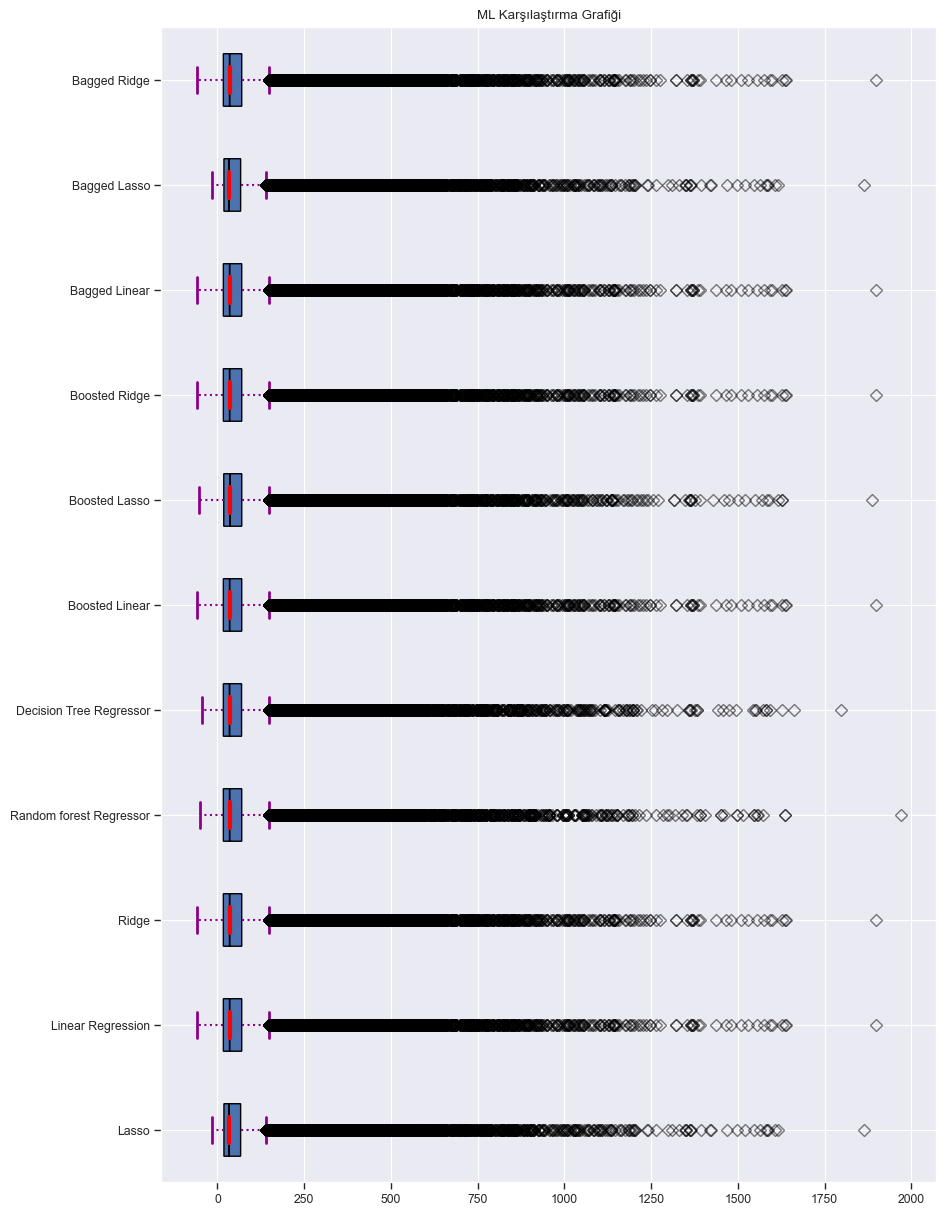

In [95]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 15))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
#biyik grafiğinin okunurluğunun artırılması için renklendirme yapılması 
## bıyıkların renginin ve çizgi genişliğinin değiştirilmesi
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

## sınır çizgilerinin renginin ve çizgi genişliğinin değiştirilmesi
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

## medyanların renginin ve çizgi genişliğini değiştirilmesi
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    

for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
ax.set_yticklabels(['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge'])
 
plt.title("ML Karşılaştırma Grafiği")
 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()

________________________________

## Delay_type kategorik etiketlemeye göre tahminleme

In [96]:
le = LabelEncoder()

In [97]:
# Kategorik değişkenleri sayısal olana dönüştürmek için etiket kodlama 
flights['AIRLINE']= le.fit_transform(flights['AIRLINE'])
flights['ORIGIN_AIRPORT'] = le.fit_transform(flights['ORIGIN_AIRPORT'])
flights['DESTINATION_AIRPORT'] = le.fit_transform(flights['DESTINATION_AIRPORT'])
flights['DELAY_TYPE'] = le.fit_transform(flights['DELAY_TYPE'])

KeyError: 'DELAY_TYPE'

In [ ]:
X = flights.drop('DELAY_TYPE',axis = 1)
X.shape

In [ ]:
y = flights['DELAY_TYPE']
y.head()

In [ ]:
# training ve test veri setlerini ayırma
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [ ]:
sc2=StandardScaler()
X_train_sc=sc2.fit_transform(X_train)
X_test_sc=sc2.transform(X_test)

In [ ]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

In [ ]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

In [ ]:
data1 = [] 
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc),
    data.extend(Y_predict)
    print(name)
    print(data1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 15))
ax = fig.add_subplot(111)
bp = ax.boxplot(data1, patch_artist = True,
                notch ='True', vert = 0)
#biyik grafiğinin okunurluğunun artırılması için renklendirme yapılması 
## bıyıkların renginin ve çizgi genişliğinin değiştirilmesi
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

## sınır çizgilerinin renginin ve çizgi genişliğinin değiştirilmesi
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

## medyanların renginin ve çizgi genişliğini değiştirilmesi
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    

for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
ax.set_yticklabels(['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge'])
 
plt.title("ML Karşılaştırma Grafiği")
 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.show()